# PROJECT - PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS

## Problem Statement
##### Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums for policyholders.

## Data Dictionary

- __policy_id:__ The unique identifier for each insurance policy.
- __policy_tenure:__ The length of time (in years) that the policy has been active.
- __age_of_car:__ The age of the insured car (in years) at the time the policy was taken.
- __age_of_policyholder:__ The age of the policyholder (in years) at the time the policy was taken.
- __area_cluster:__ A categorical variable representing the cluster or category to which the area of residence belongs.
- __population_density:__ A measure of the population density of the area where the policyholder resides.
- __Make:__  The make or manufacturer of the insured car.
- __segment:__ The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).
- __model:__ The specific model or variant of the insured car.
- __fuel_type:__ The type of fuel used by the insured car (e.g., petrol, diesel, electric).
- __max_torque:__ The maximum torque output of the car's engine.
- __max_power:__ The maximum power output of the car's engine.
- __engine_type:__ The type of engine used in the insured car (e.g., inline, V-type).
- __airbags:__ The number of airbags installed in the car.
- __is_esc:__ A binary variable indicating whether the car has an electronic stability control (ESC) system.
- __is_adjustable_steering:__ A binary variable indicating whether the car has adjustable steering.
- __is_tpms:__ A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).
- __is_parking_sensors:__ A binary variable indicating whether the car has parking sensors.
- __is_parking_camera:__ A binary variable indicating whether the car has a parking camera.
- __rear_brakes_type:__ The type of rear brakes used in the car.
- __displacement:__ The engine displacement of the car (typically measured in liters or cubic centimeters).
- __cylinder:__ The number of cylinders in the car's engine.
- __transmission_type:__ The type of transmission used in the car (e.g., manual, automatic).
- __gear_box:__ The number of gears in the car's gearbox.
- __steering_type:__ The type of steering system used in the car.
- __turning_radius:__ The minimum radius of the circular path that the car can make.
- __length:__ The length of the car.
- __width:__ The width of the car.
- __height:__ The height of the car.
- __gross_weight:__ The gross weight or total weight of the car.
- __is_front_fog_lights:__ A binary variable indicating whether the car has front fog lights.
- __is_rear_window_wiper:__ A binary variable indicating whether the car has a rear window wiper.
- __is_rear_window_washer:__ A binary variable indicating whether the car has a rear window washer.
- __is_rear_window_defogger:__ A binary variable indicating whether the car has a rear window defogger.
- __is_brake_assist:__ A binary variable indicating whether the car has a brake assist system.
- __is_power_door_locks:__ A binary variable indicating whether the car has power door locks.
- __is_central_locking:__ A binary variable indicating whether the car has central locking.
- __is_power_steering:__ A binary variable indicating whether the car has power steering.
- __is_driver_seat_height_adjustable:__ A binary variable indicating whether the driver's seat height is adjustable.
- __is_day_night_rear_view_mirror:__ A binary variable indicating whether the car has a day/night rearview mirror
- __is_ecw:__ A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.
- __is_speed_alert:__ A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.
- __Ncap_rating-__ Information about the safety rating of the car.
- __Is_claim-(Target column)-__ 0- No, 1- Yes


## Importing Basic Libraries


In [17]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Importing the Dataset

In [18]:
df = pd.read_csv('Insurance_Data (1).csv')

In [19]:
df.head()

policy_id  policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0   ID00001       0.515874        0.05             0.644231           C1   
1   ID00002       0.672619        0.02             0.375000           C2   
2   ID00003       0.841110        0.02             0.384615           C3   
3   ID00004       0.900277        0.11             0.432692           C4   
4   ID00005       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No     

## Basic Info about the Dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

- There are total 44 columns and 58592 rows 
- There are total 16 numerical and 28 object variables
- There are no missing values as per the above info

## Data Preprocessing

#### Check for insignificant columns

- policy_id is insignificant column which can be dropped 

In [21]:
df.drop(columns='policy_id', inplace=True)

## Data Cleaning

In [22]:
df.head()

policy_tenure  age_of_car  age_of_policyholder area_cluster  \
0       0.515874        0.05             0.644231           C1   
1       0.672619        0.02             0.375000           C2   
2       0.841110        0.02             0.384615           C3   
3       0.900277        0.11             0.432692           C4   
4       0.596403        0.11             0.634615           C5   

   population_density  make segment model fuel_type     max_torque  \
0                4990     1       A    M1       CNG   60Nm@3500rpm   
1               27003     1       A    M1       CNG   60Nm@3500rpm   
2                4076     1       A    M1       CNG   60Nm@3500rpm   
3               21622     1      C1    M2    Petrol  113Nm@4400rpm   
4               34738     2       A    M3    Petrol   91Nm@4250rpm   

          max_power         engine_type  airbags is_esc  \
0  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  
0                            No     No            Yes            0         0  
1                            No     No            Yes            0         0  
2                        

In [23]:
# policy_tenure, age_of_car and age_of_policyholder is already scaled data

### age_of_car

In [24]:
min_car_age=0
max_car_age=15
df['original_age_car'] = np.interp(df['age_of_car'], (0, 1), (min_car_age, max_car_age))

### policy tenure

In [15]:
# Generally, Policy Tenure is for 1 year hence, no need for transformation

### age_of_policyholder

In [25]:
min_age=18
max_age=100
df['original_age_data'] = np.interp(df['age_of_policyholder'], (0, 1), (min_age, max_age))

In [28]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type     max_torque         max_power         engine_type  airbags  \
0       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
2       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
3    Petrol  113Nm@4400rpm  88.50bhp@6000rpm  1.2 L K12N Dualjet        2   
4    Petrol   91Nm@4250rpm  67.06bhp@5500rpm             1.0 SCe        2   

  is_esc is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0     No                     No      No                Yes                No   
1     No                     No      No                Yes                No   
2     No                     No      No                Yes                No   
3    Yes                    Yes      No                Yes               Yes   
4     No                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  \
0                            No     No            Yes            0         0   
1                            No     No            Yes            0         0   
2                            No     No            Yes            0         0   
3                           Yes    Yes            Yes            2         0   
4                           Yes    Yes            Yes            2         0   

   origina

In [27]:
df.drop(columns=['age_of_car','age_of_policyholder'], inplace=True)

In [29]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type     max_torque         max_power         engine_type  airbags  \
0       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
2       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
3    Petrol  113Nm@4400rpm  88.50bhp@6000rpm  1.2 L K12N Dualjet        2   
4    Petrol   91Nm@4250rpm  67.06bhp@5500rpm             1.0 SCe        2   

  is_esc is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0     No                     No      No                Yes                No   
1     No                     No      No                Yes                No   
2     No                     No      No                Yes                No   
3    Yes                    Yes      No                Yes               Yes   
4     No                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  \
0                            No     No            Yes            0         0   
1                            No     No            Yes            0         0   
2                            No     No            Yes            0         0   
3                           Yes    Yes            Yes            2         0   
4                           Yes    Yes            Yes            2         0   

   origina

In [30]:
for i in df.columns[(df.dtypes=='object').values].tolist():
    print(i, '\n')
    print(df[i].value_counts())
    print("********************"*5)

area_cluster 

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
****************************************************************************************************
segment 

B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
****************************************************************************************************
model 

M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
****************************************************************************************************
fuel_type 

Petrol    20532
CNG       20330
Di

### max_torque variable

- Torque can be defined as an engine's 'pulling force' and helps a vehicle with initial acceleration.
- This is why heavier vehicles like SUVs often use engines that deliver a high amount of torque.
- Power is defined as the rate at which an object does work. 
- A vehicle with more power ideally will have better acceleration and higher top speed.
- Torque refers to the capacity to do work, while power is the rate of completing work in a given amount of time. The primary use of torque is to make the car accelerate in the initial stages of movement, while the horsepower determines the rate of the acceleration of the vehicle.

- Max_torque can be converted into power variable
- 1 kW≈1.34102 bhp
- Power (bhp) = Torque (N.m) x Speed (RPM) x 1.34102/ 9.5488
- The constant 9.5488 is a conversion factor

In [31]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type     max_torque         max_power         engine_type  airbags  \
0       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
1       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
2       CNG   60Nm@3500rpm  40.36bhp@6000rpm   F8D Petrol Engine        2   
3    Petrol  113Nm@4400rpm  88.50bhp@6000rpm  1.2 L K12N Dualjet        2   
4    Petrol   91Nm@4250rpm  67.06bhp@5500rpm             1.0 SCe        2   

  is_esc is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0     No                     No      No                Yes                No   
1     No                     No      No                Yes                No   
2     No                     No      No                Yes                No   
3    Yes                    Yes      No                Yes               Yes   
4     No                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  \
0                            No     No            Yes            0         0   
1                            No     No            Yes            0         0   
2                            No     No            Yes            0         0   
3                           Yes    Yes            Yes            2         0   
4                           Yes    Yes            Yes            2         0   

   origina

In [32]:
# extracting values from max_torque variable

df[['torque_Nm','torque_rpm']] = df['max_torque'].str.extract(r'(\d+)Nm@(\d+)rpm')

#converting into numeric variables
df['torque_Nm'] = pd.to_numeric(df['torque_Nm'])
df['torque_rpm'] = pd.to_numeric(df['torque_rpm'])

# Converting torque into power
df['torque(Nm/rpm)'] = round(df['torque_Nm']/df['torque_rpm'],2)

# dropping other variables
df.drop(['max_torque', 'torque_Nm', 'torque_rpm'], axis=1, inplace=True)


In [33]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type         max_power         engine_type  airbags is_esc  \
0       CNG  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
1       CNG  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
2       CNG  40.36bhp@6000rpm   F8D Petrol Engine        2     No   
3    Petrol  88.50bhp@6000rpm  1.2 L K12N Dualjet        2    Yes   
4    Petrol  67.06bhp@5500rpm             1.0 SCe        2     No   

  is_adjustable_steering is_tpms is_parking_sensors is_parking_camera  \
0                     No      No                Yes                No   
1                     No      No                Yes                No   
2                     No      No                Yes                No   
3                    Yes      No                Yes               Yes   
4                     No      No                 No               Yes   

  rear_brakes_type  displacement  cylinder transmission_type  gear_box  \
0             Drum           796         3            Manual         5   
1             Drum           796         3            Manual         5   
2             Drum           796         3            Manual         5   
3             Drum          1197         4         Automatic         5   
4             Drum           999         3         Automatic         5   

  steering_type  turning_radius  length  width  height  gross_weight  \
0         Power             4.6    3445   1515    1475          1185   
1         Power             4.6    3445   1515    1475          1185   
2         Power             4.6    3445   1515    1475          1185   
3      Electric             4.8    3995   1735    1515          1335   
4      Electric             5.0    3731   1579    1490          1155   

  is_front_fog_lights is_rear_window_wiper is_rear_window_washer  \
0                  No                   No                    No   
1                  No                   No                    No   
2                  No                   No                    No   
3                 Yes                   No                    No   
4                  No                   No                    No   

  is_rear_window_defogger is_brake_assist is_power_door_locks  \
0                      No              No                  No   
1                      No              No                  No   
2                      No              No                  No   
3                     Yes             Yes                 Yes   
4                      No              No                 Yes   

  is_central_locking is_power_steering is_driver_seat_height_adjustable  \
0                 No               Yes                               No   
1                 No               Yes                               No   
2                 No               Yes                               No   
3                Yes               Yes                              Yes   
4                Yes               Yes                               No   

  is_day_night_rear_view_mirror is_ecw is_speed_alert  ncap_rating  is_claim  \
0                            No     No            Yes            0         0   
1                            No     No            Yes            0         0   
2                            No     No            Yes            0         0   
3                           Yes    Yes            Yes            2         0   
4                           Yes    Yes            Yes            2         0   

   original_age_car  original_age_data  torque(Nm/rpm)  
0              0.75          70.826923     

## max_power variable

- max_power can be converted to torque
- Torque (lb.in) = 63,025 x Power (HP) / Speed (RPM)
- Torque (nM) = 0.112984 x Torque (lb.in)
- The constant 63,025 is a conversion factor

In [34]:
# extracting values from max_power variable

df[['power_bhp','power_rpm']] = df['max_power'].str.extract(r'([\d.]+)bhp@(\d+)rpm')

#converting into numeric variables
df['power_bhp'] = pd.to_numeric(df['power_bhp'])
df['power_rpm'] = pd.to_numeric(df['power_rpm'])

# Converting torque into power
df['power(bhp/rpm)'] = round(df['power_bhp']/df['power_rpm'],2)

# dropping other variables
df.drop(['max_power', 'power_bhp', 'power_rpm'], axis=1, inplace=True)

In [35]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type         engine_type  airbags is_esc is_adjustable_steering  \
0       CNG   F8D Petrol Engine        2     No                     No   
1       CNG   F8D Petrol Engine        2     No                     No   
2       CNG   F8D Petrol Engine        2     No                     No   
3    Petrol  1.2 L K12N Dualjet        2    Yes                    Yes   
4    Petrol             1.0 SCe        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum           796   
2      No                Yes                No             Drum           796   
3      No                Yes               Yes             Drum          1197   
4      No                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   
3         4         Automatic         5      Electric             4.8    3995   
4         3         Automatic         5      Electric             5.0    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0            Yes            0         0              0.75          70.826923   
1            Yes            0         0              0.30          48.750000   
2            Yes            0         0              0.30          49.538462   
3            Yes            2         0              1.65          53.480769   
4            Yes            2         0              1.65          

### Handling Missing Values

In [36]:
df.isnull().sum()

policy_tenure                       0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width                               0
height                              0
gross_weight                        0
is_front_fog_lights                 0
is_rear_wind

In [37]:
# There are no missing values found

### Check for duplicate values

In [38]:
df.duplicated().sum()

0

In [39]:
# There are no duplicate values found

### Exploratory Data Analysis

In [40]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type         engine_type  airbags is_esc is_adjustable_steering  \
0       CNG   F8D Petrol Engine        2     No                     No   
1       CNG   F8D Petrol Engine        2     No                     No   
2       CNG   F8D Petrol Engine        2     No                     No   
3    Petrol  1.2 L K12N Dualjet        2    Yes                    Yes   
4    Petrol             1.0 SCe        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum           796   
2      No                Yes                No             Drum           796   
3      No                Yes               Yes             Drum          1197   
4      No                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   
3         4         Automatic         5      Electric             4.8    3995   
4         3         Automatic         5      Electric             5.0    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0            Yes            0         0              0.75          70.826923   
1            Yes            0         0              0.30          48.750000   
2            Yes            0         0              0.30          49.538462   
3            Yes            2         0              1.65          53.480769   
4            Yes            2         0              1.65          

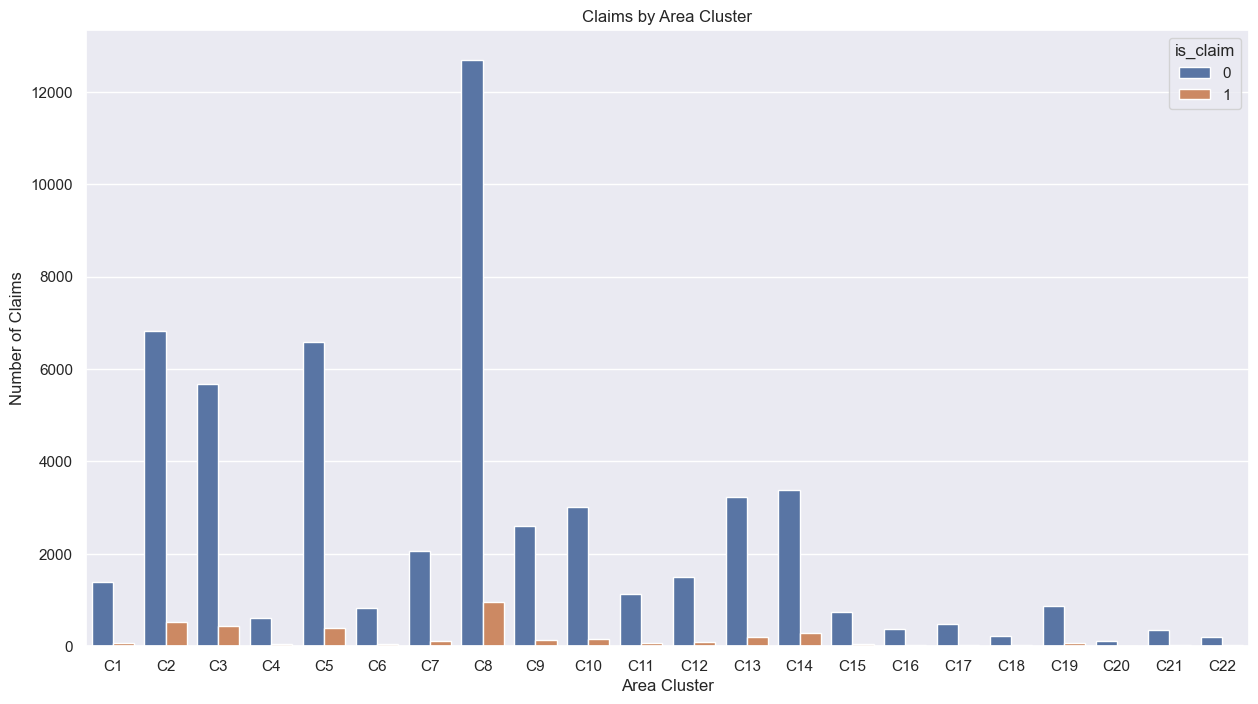

In [41]:
# Maximum claims are from cluster C8

plt.figure(figsize=(15, 8))
sns.countplot(x='area_cluster', data=df, hue='is_claim')
plt.title('Claims by Area Cluster')
plt.xlabel('Area Cluster')
plt.ylabel('Number of Claims')
plt.show()

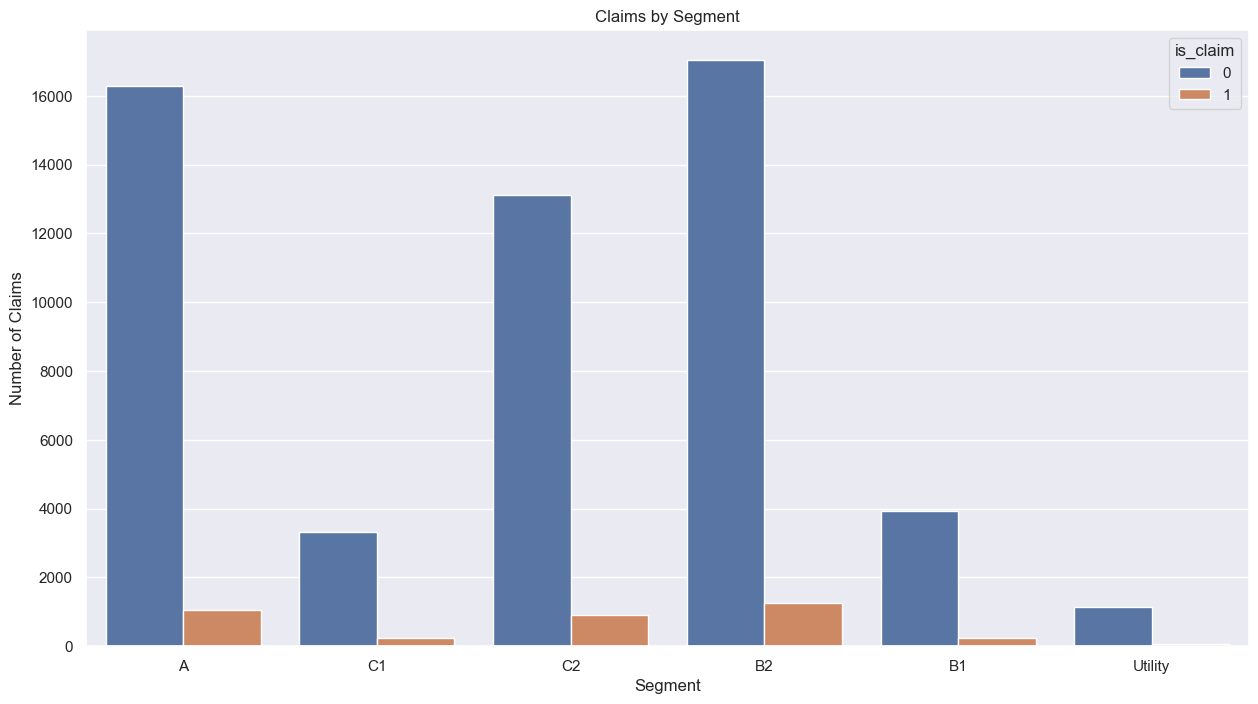

In [42]:
# Maximum claims are from segment B2

plt.figure(figsize=(15, 8))
sns.countplot(x='segment', data=df, hue='is_claim')
plt.title('Claims by Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Claims')
plt.show()

In [43]:
# Maximum claims are from model M1

plt.figure(figsize=(15, 8))
sns.countplot(x='model', data=df, hue='is_claim')
plt.title('Claims by Model')
plt.xlabel('Model')
plt.ylabel('Number of Claims')
plt.show()

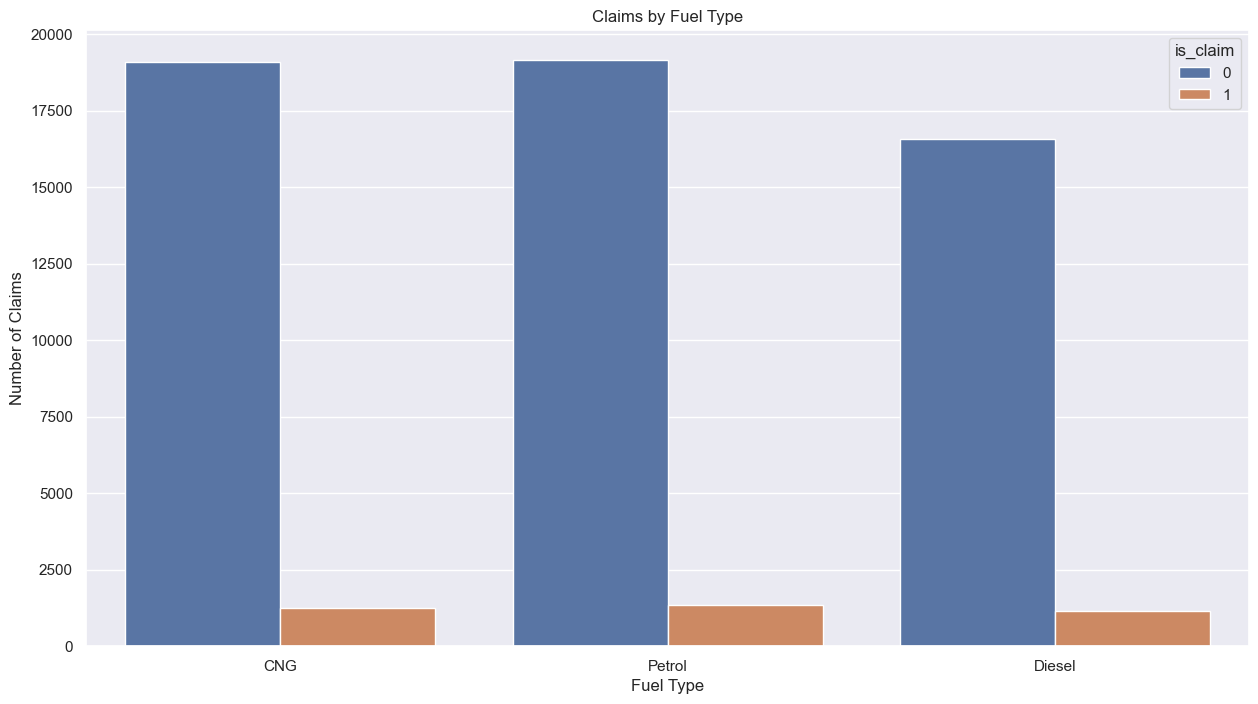

In [44]:
# Maximum claims are from fuel_type B2

plt.figure(figsize=(15, 8))
sns.countplot(x='fuel_type', data=df, hue='is_claim')
plt.title('Claims by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Claims')
plt.show()

In [45]:
df.hist(figsize=(20, 15), bins=20)
plt.suptitle('Distribution of Numerical Variables', y=1.02)
plt.show()

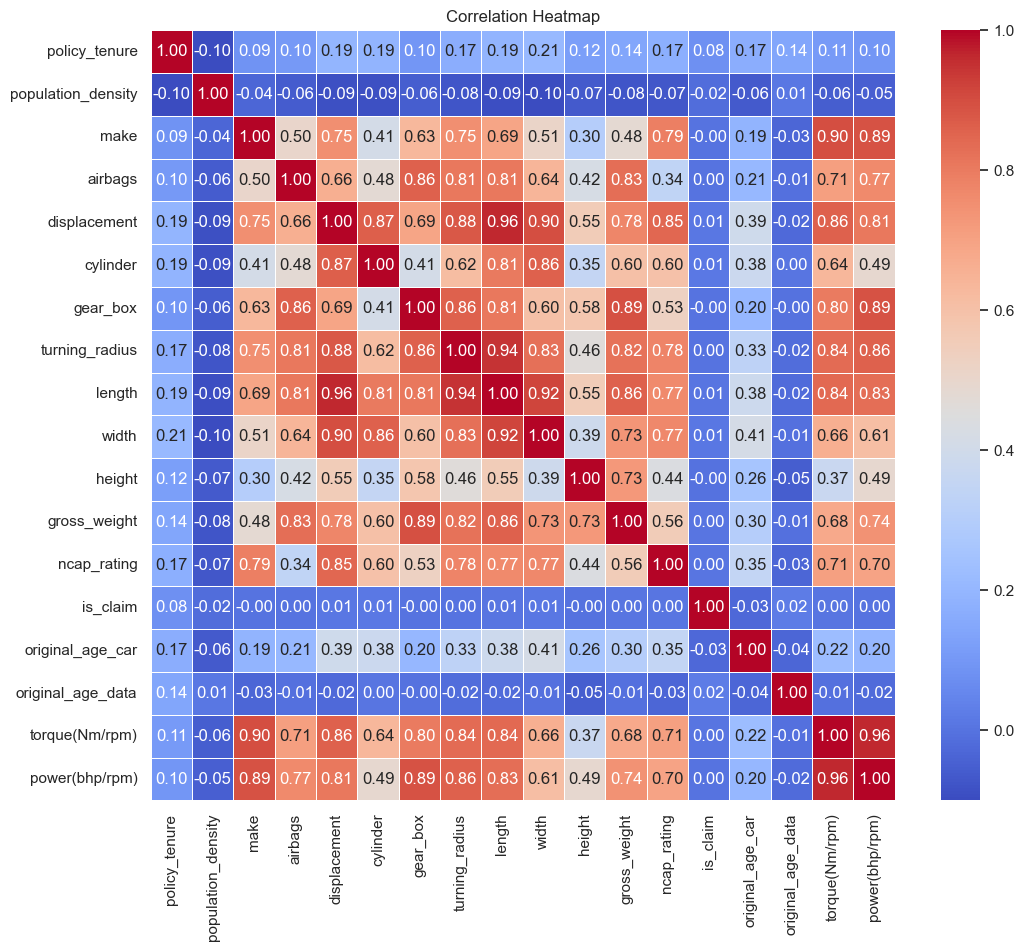

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# correlation coefficient is close to 0, it indicates a weak or no linear relationship. 
# Changes in one variable are not predictive of changes in the other variable.

In [48]:
# Box plots for categorical variables
plt.figure(figsize=(14, 8))
sns.barplot(x='fuel_type', y='power(bhp/rpm)', data=df)
plt.title('Max Power by Fuel Type')
plt.show()

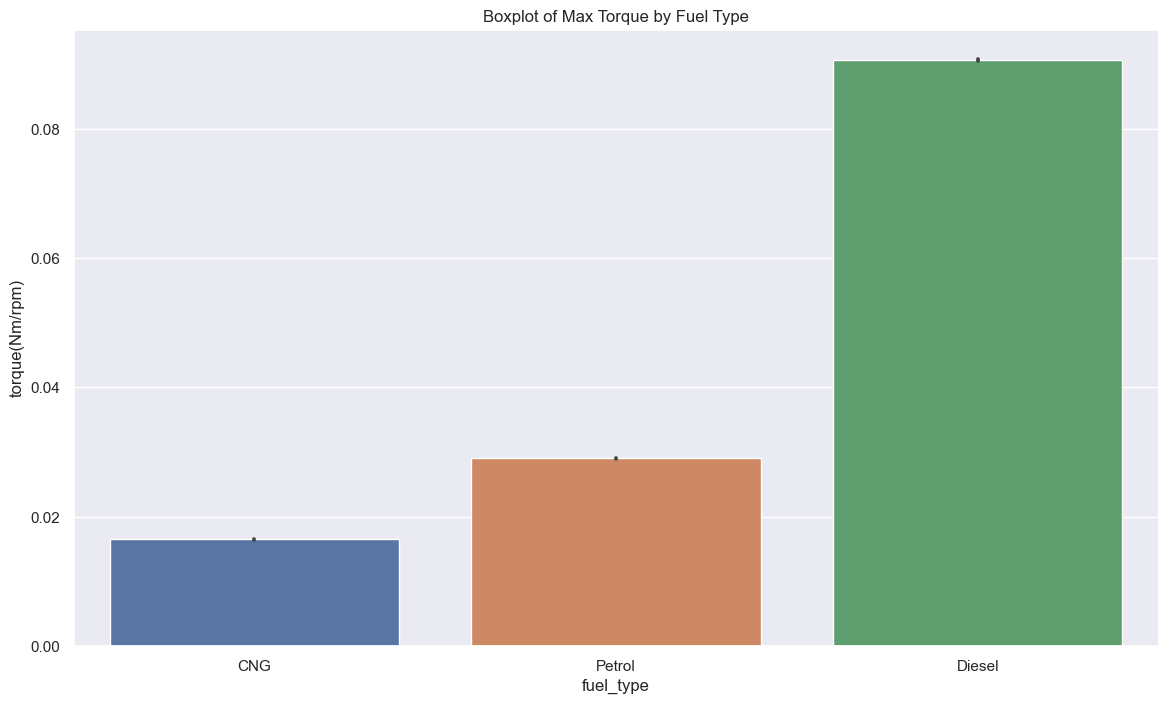

In [49]:
plt.figure(figsize=(14, 8))
sns.barplot(x='fuel_type', y='torque(Nm/rpm)', data=df)
plt.title('Boxplot of Max Torque by Fuel Type')
plt.show()

In [50]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type         engine_type  airbags is_esc is_adjustable_steering  \
0       CNG   F8D Petrol Engine        2     No                     No   
1       CNG   F8D Petrol Engine        2     No                     No   
2       CNG   F8D Petrol Engine        2     No                     No   
3    Petrol  1.2 L K12N Dualjet        2    Yes                    Yes   
4    Petrol             1.0 SCe        2     No                     No   

  is_tpms is_parking_sensors is_parking_camera rear_brakes_type  displacement  \
0      No                Yes                No             Drum           796   
1      No                Yes                No             Drum           796   
2      No                Yes                No             Drum           796   
3      No                Yes               Yes             Drum          1197   
4      No                 No               Yes             Drum           999   

   cylinder transmission_type  gear_box steering_type  turning_radius  length  \
0         3            Manual         5         Power             4.6    3445   
1         3            Manual         5         Power             4.6    3445   
2         3            Manual         5         Power             4.6    3445   
3         4         Automatic         5      Electric             4.8    3995   
4         3         Automatic         5      Electric             5.0    3731   

   width  height  gross_weight is_front_fog_lights is_rear_window_wiper  \
0   1515    1475          1185                  No                   No   
1   1515    1475          1185                  No                   No   
2   1515    1475          1185                  No                   No   
3   1735    1515          1335                 Yes                   No   
4   1579    1490          1155                  No                   No   

  is_rear_window_washer is_rear_window_defogger is_brake_assist  \
0                    No                      No              No   
1                    No                      No              No   
2                    No                      No              No   
3                    No                     Yes             Yes   
4                    No                      No              No   

  is_power_door_locks is_central_locking is_power_steering  \
0                  No                 No               Yes   
1                  No                 No               Yes   
2                  No                 No               Yes   
3                 Yes                Yes               Yes   
4                 Yes                Yes               Yes   

  is_driver_seat_height_adjustable is_day_night_rear_view_mirror is_ecw  \
0                               No                            No     No   
1                               No                            No     No   
2                               No                            No     No   
3                              Yes                           Yes    Yes   
4                               No                           Yes    Yes   

  is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0            Yes            0         0              0.75          70.826923   
1            Yes            0         0              0.30          48.750000   
2            Yes            0         0              0.30          49.538462   
3            Yes            2         0              1.65          53.480769   
4            Yes            2         0              1.65          

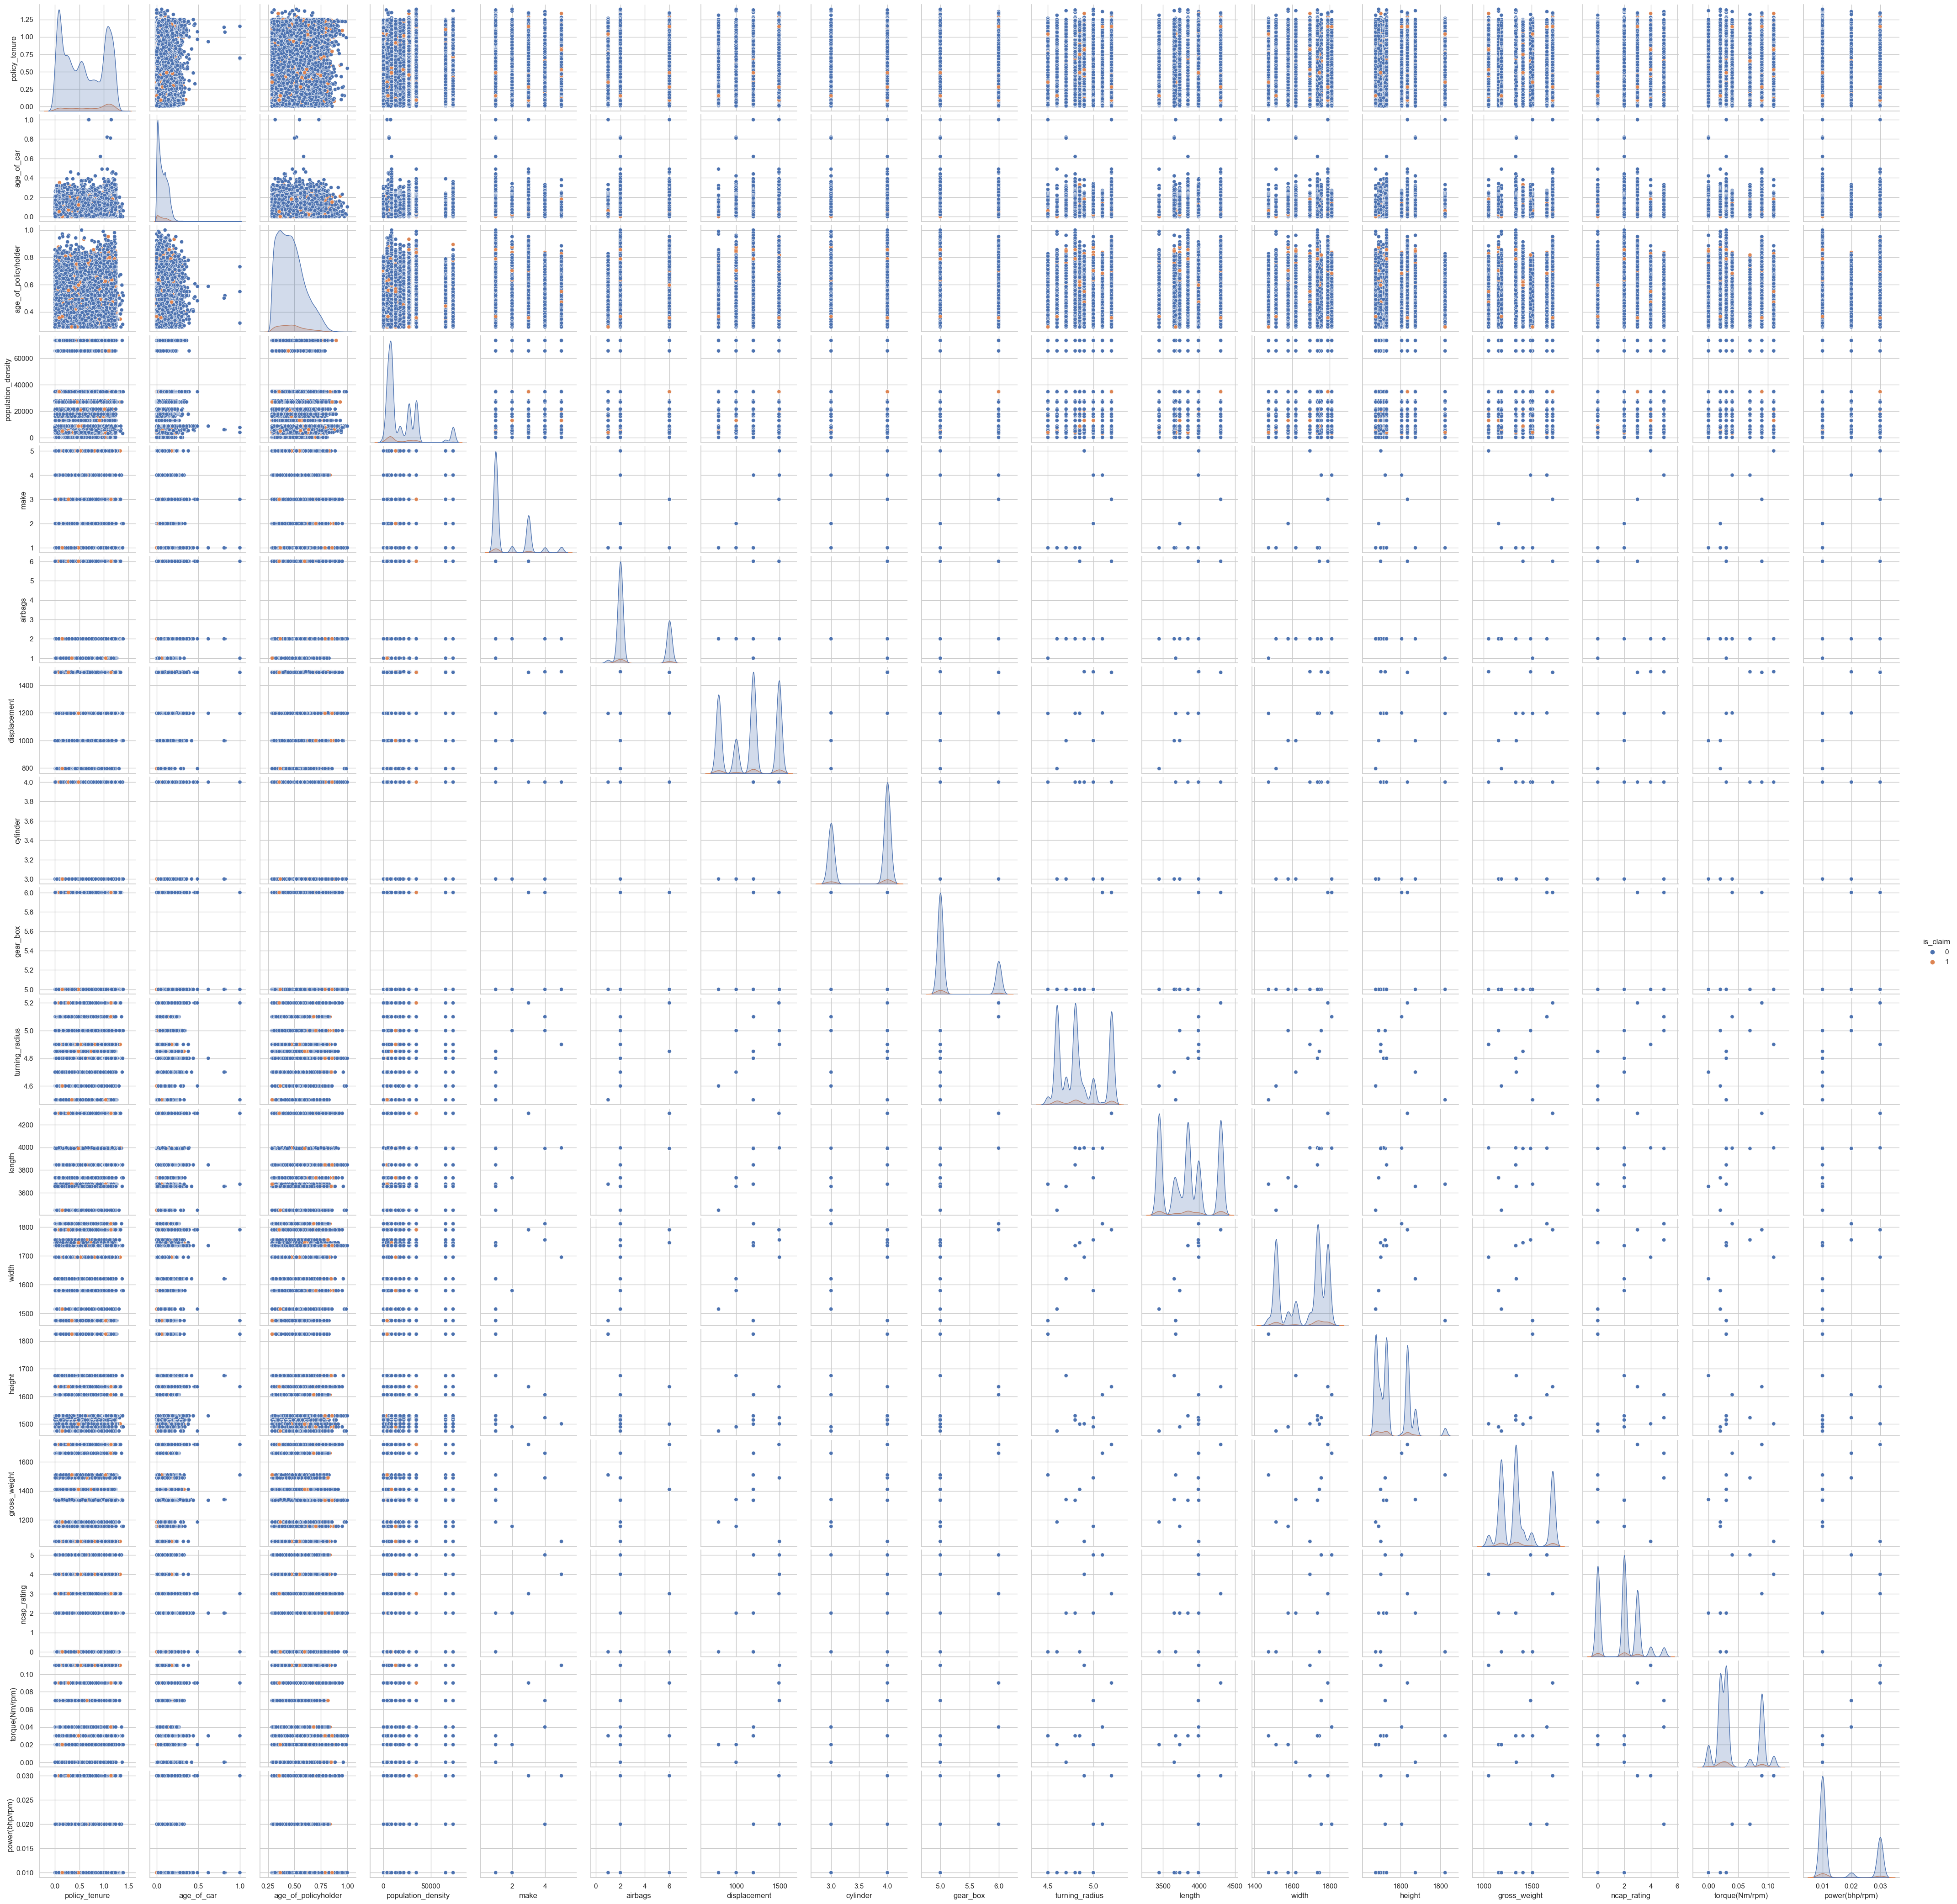

In [29]:
sns.set_style('whitegrid')
sns.pairplot(data=df, diag_kind='kde',hue='is_claim')
plt.show()

## Encoding

#### Encoding Binary Features by Label Encoding

In [51]:
binary_cols=['is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','is_front_fog_lights',
'is_rear_window_wiper','is_rear_window_washer','is_rear_window_defogger','is_brake_assist','is_power_door_locks',
'is_central_locking','is_power_steering','is_driver_seat_height_adjustable','is_day_night_rear_view_mirror','is_ecw','is_speed_alert']

In [52]:
df[binary_cols] = df[binary_cols].replace({'Yes':1,'No':0})

In [53]:
df.head()

policy_tenure area_cluster  population_density  make segment model  \
0       0.515874           C1                4990     1       A    M1   
1       0.672619           C2               27003     1       A    M1   
2       0.841110           C3                4076     1       A    M1   
3       0.900277           C4               21622     1      C1    M2   
4       0.596403           C5               34738     2       A    M3   

  fuel_type         engine_type  airbags  is_esc  is_adjustable_steering  \
0       CNG   F8D Petrol Engine        2       0                       0   
1       CNG   F8D Petrol Engine        2       0                       0   
2       CNG   F8D Petrol Engine        2       0                       0   
3    Petrol  1.2 L K12N Dualjet        2       1                       1   
4    Petrol             1.0 SCe        2       0                       0   

   is_tpms  is_parking_sensors  is_parking_camera rear_brakes_type  \
0        0                   1                  0             Drum   
1        0                   1                  0             Drum   
2        0                   1                  0             Drum   
3        0                   1                  1             Drum   
4        0                   0                  1             Drum   

   displacement  cylinder transmission_type  gear_box steering_type  \
0           796         3            Manual         5         Power   
1           796         3            Manual         5         Power   
2           796         3            Manual         5         Power   
3          1197         4         Automatic         5      Electric   
4           999         3         Automatic         5      Electric   

   turning_radius  length  width  height  gross_weight  is_front_fog_lights  \
0             4.6    3445   1515    1475          1185                    0   
1             4.6    3445   1515    1475          1185                    0   
2             4.6    3445   1515    1475          1185                    0   
3             4.8    3995   1735    1515          1335                    1   
4             5.0    3731   1579    1490          1155                    0   

   is_rear_window_wiper  is_rear_window_washer  is_rear_window_defogger  \
0                     0                      0                        0   
1                     0                      0                        0   
2                     0                      0                        0   
3                     0                      0                        1   
4                     0                      0                        0   

   is_brake_assist  is_power_door_locks  is_central_locking  \
0                0                    0                   0   
1                0                    0                   0   
2                0                    0                   0   
3                1                    1                   1   
4                0                    1                   1   

   is_power_steering  is_driver_seat_height_adjustable  \
0                  1                                 0   
1                  1                                 0   
2                  1                                 0   
3                  1                                 1   
4                  1                                 0   

   is_day_night_rear_view_mirror  is_ecw  is_speed_alert  ncap_rating  \
0                              0       0               1            0   
1                              0       0               1            0   
2                              0       0               1            0   
3                              1       1               1            2   
4                              1       1               1            2   

   is_claim  original_age_car  original_age_data  torque(Nm/rpm)  \
0         0              0.75          70.826923            0.02   
1         0              0.30 

#### One Hot Encoding remaining features

In [54]:
ohe_cols = ['area_cluster','segment','model','fuel_type','engine_type','rear_brakes_type','transmission_type',
           'steering_type']

In [55]:
df = pd.get_dummies(df, columns=ohe_cols,drop_first=True)

In [56]:
df.head()

policy_tenure  population_density  make  airbags  is_esc  \
0       0.515874                4990     1        2       0   
1       0.672619               27003     1        2       0   
2       0.841110                4076     1        2       0   
3       0.900277               21622     1        2       1   
4       0.596403               34738     2        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   displacement  cylinder  gear_box  turning_radius  length  width  height  \
0           796         3         5             4.6    3445   1515    1475   
1           796         3         5             4.6    3445   1515    1475   
2           796         3         5             4.6    3445   1515    1475   
3          1197         4         5             4.8    3995   1735    1515   
4           999         3         5             5.0    3731   1579    1490   

   gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0          1185                    0                     0   
1          1185                    0                     0   
2          1185                    0                     0   
3          1335                    1                     0   
4          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0               1            0         0              0.75          70.826923   
1               1            0         0              0.30          48.750000   
2               1            0         0              0.30          49.538462   
3               1            2         0              1.65          53.480769   
4               1            2         0              1.65          70.038462   

   torque(Nm/rpm)  power(bhp/rpm)  area_cluster_C10  area_cluster_C11  \
0            0.02            0.01                 0                 0   
1            0.02            0.01                 0                 0   
2            0.02            0.01                 0                 0   
3            0.03            0.01                 0                 0   
4            0.02            0.01                 0                 0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0                 0                

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 87 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   policy_tenure                          58592 non-null  float64
 1   population_density                     58592 non-null  int64  
 2   make                                   58592 non-null  int64  
 3   airbags                                58592 non-null  int64  
 4   is_esc                                 58592 non-null  int64  
 5   is_adjustable_steering                 58592 non-null  int64  
 6   is_tpms                                58592 non-null  int64  
 7   is_parking_sensors                     58592 non-null  int64  
 8   is_parking_camera                      58592 non-null  int64  
 9   displacement                           58592 non-null  int64  
 10  cylinder                               58592 non-null  int64  
 11  ge

## Splitting Data into dependent (x) and independent (y) variables

In [58]:
x= df.drop(columns='is_claim')
y= df[['is_claim']]

In [59]:
x.head()

policy_tenure  population_density  make  airbags  is_esc  \
0       0.515874                4990     1        2       0   
1       0.672619               27003     1        2       0   
2       0.841110                4076     1        2       0   
3       0.900277               21622     1        2       1   
4       0.596403               34738     2        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   displacement  cylinder  gear_box  turning_radius  length  width  height  \
0           796         3         5             4.6    3445   1515    1475   
1           796         3         5             4.6    3445   1515    1475   
2           796         3         5             4.6    3445   1515    1475   
3          1197         4         5             4.8    3995   1735    1515   
4           999         3         5             5.0    3731   1579    1490   

   gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0          1185                    0                     0   
1          1185                    0                     0   
2          1185                    0                     0   
3          1335                    1                     0   
4          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  original_age_car  original_age_data  \
0               1            0              0.75          70.826923   
1               1            0              0.30          48.750000   
2               1            0              0.30          49.538462   
3               1            2              1.65          53.480769   
4               1            2              1.65          70.038462   

   torque(Nm/rpm)  power(bhp/rpm)  area_cluster_C10  area_cluster_C11  \
0            0.02            0.01                 0                 0   
1            0.02            0.01                 0                 0   
2            0.02            0.01                 0                 0   
3            0.03            0.01                 0                 0   
4            0.02            0.01                 0                 0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0                 0                 0                 0                 0   
1                 

In [60]:
y.head()

is_claim
0         0
1         0
2         0
3         0
4         0

### Check for outliers

In [63]:
df.describe()

policy_tenure  population_density          make       airbags  \
count   58592.000000        58592.000000  58592.000000  58592.000000   
mean        0.611246        18826.858667      1.763722      3.137066   
std         0.414156        17660.174792      1.136988      1.832641   
min         0.002735          290.000000      1.000000      1.000000   
25%         0.210250         6112.000000      1.000000      2.000000   
50%         0.573792         8794.000000      1.000000      2.000000   
75%         1.039104        27003.000000      3.000000      6.000000   
max         1.396641        73430.000000      5.000000      6.000000   

             is_esc  is_adjustable_steering       is_tpms  is_parking_sensors  \
count  58592.000000            58592.000000  58592.000000        58592.000000   
mean       0.314053                0.606329      0.239248            0.959500   
std        0.464142                0.488568      0.426628            0.197131   
min        0.000000                0.000000      0.000000            0.000000   
25%        0.000000                0.000000      0.000000            1.000000   
50%        0.000000                1.000000      0.000000            1.000000   
75%        1.000000                1.000000      0.000000            1.000000   
max        1.000000                1.000000      1.000000            1.000000   

       is_parking_camera  displacement      cylinder      gear_box  \
count       58592.000000  58592.000000  58592.000000  58592.000000   
mean            0.390634   1162.355851      3.626963      5.245443   
std             0.487897    266.304786      0.483616      0.430353   
min             0.000000    796.000000      3.000000      5.000000   
25%             0.000000    796.000000      3.000000      5.000000   
50%             0.000000   1197.000000      4.000000      5.000000   
75%             1.000000   1493.000000      4.000000      5.000000   
max             1.000000   1498.000000      4.000000      6.000000   

       turning_radius        length         width       height  gross_weight  \
count    58592.000000  58592.000000  58592.000000  58592.00000  58592.000000   
mean         4.852893   3850.476891   1672.233667   1553.33537   1385.276813   
std          0.228061    311.457119    112.089135     79.62227    212.423085   
min          4.500000   3445.000000   1475.000000   1475.00000   1051.000000   
25%          4.600000   3445.000000   1515.000000   1475.00000   1185.000000   
50%          4.800000   3845.000000   1735.000000   1530.00000   1335.000000   
75%          5.000000   3995.000000   1755.000000   1635.00000   1510.000000   
max          5.200000   4300.000000   1811.000000   1825.00000   1720.000000   

       is_front_fog_lights  is_rear_window_wiper  is_rear_window_washer  \
count         58592.000000          58592.000000           58592.000000   
mean              0.579055              0.289425               0.289425   
std               0.493715              0.453499               0.453499   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       is_rear_window_defogger  is_brake_assist  is_power_door_locks  \
count             58592.000000     58592.000000         58592.000000   
mean                  0.350133         0.549171             0.724246   
std                   0.477016         0.497581             0.446897   
min                   0.000000         0.000000             0.000000   
25%                   0.000000         0.000000             0.000000   
50%                   0.000000         1.000000             1.000000   
75%                   1.000000         1.000000             1.000000   
max                   1.

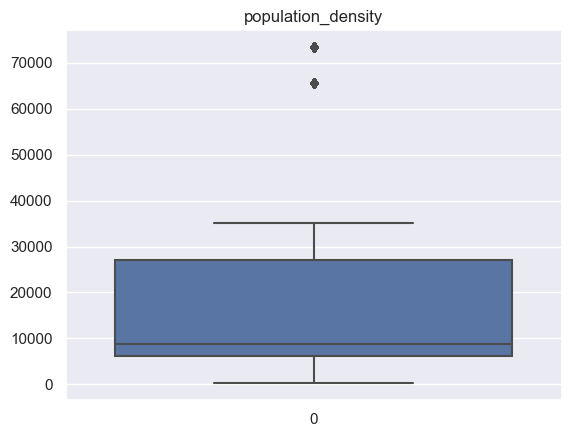

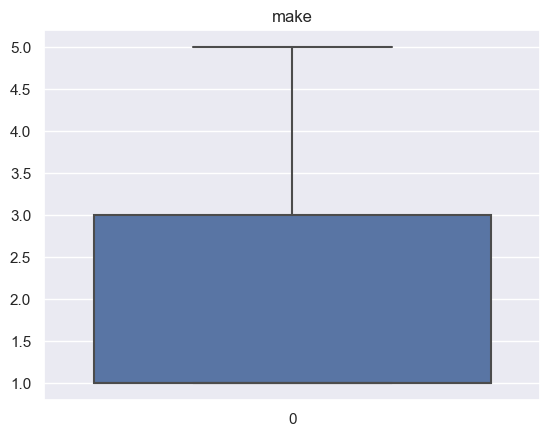

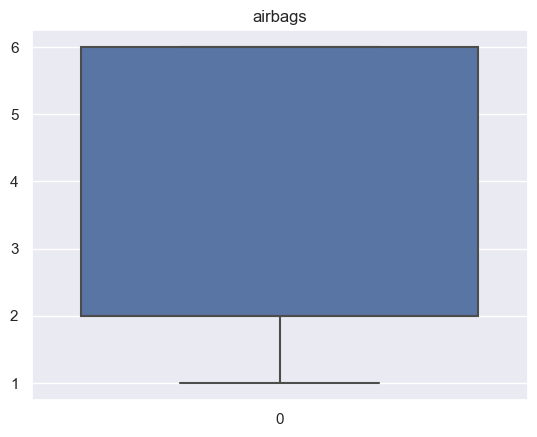

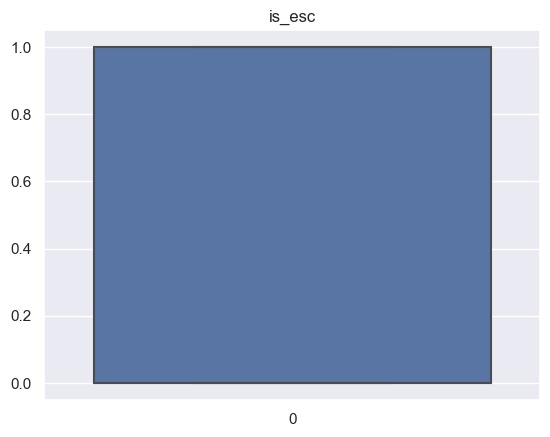

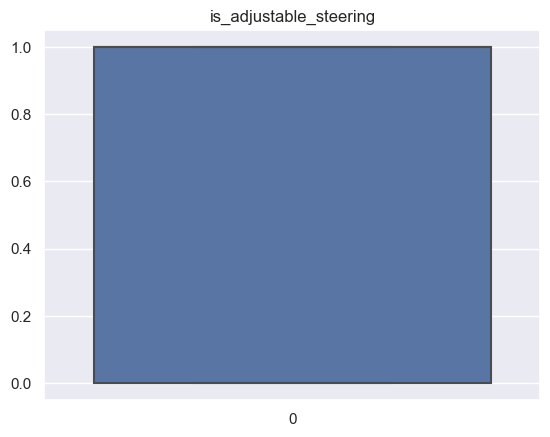

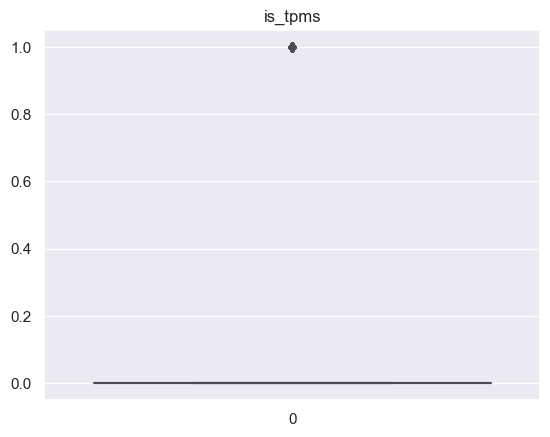

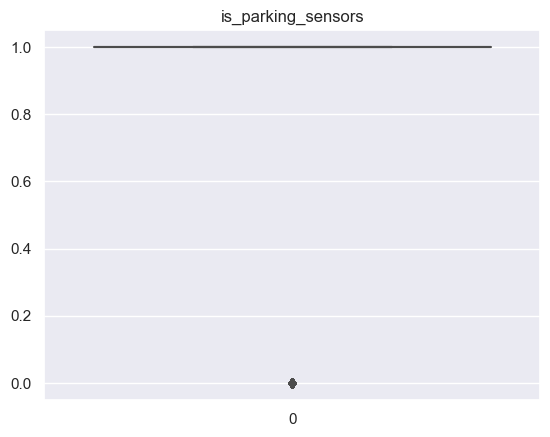

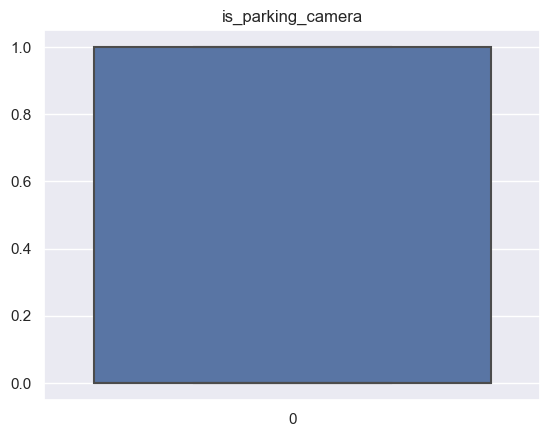

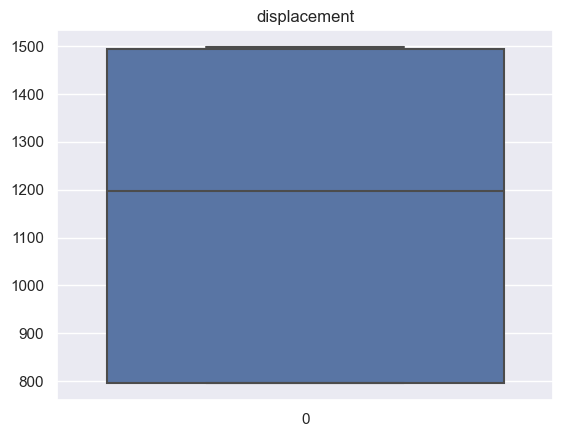

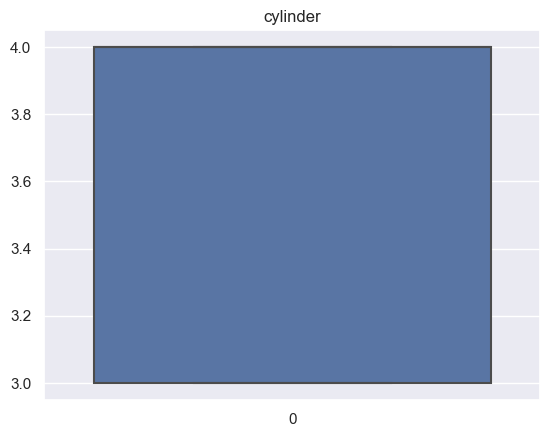

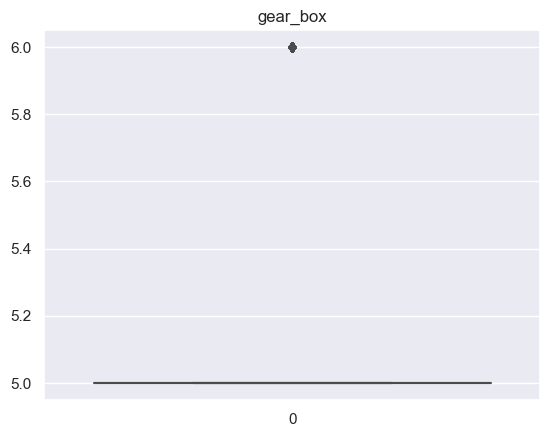

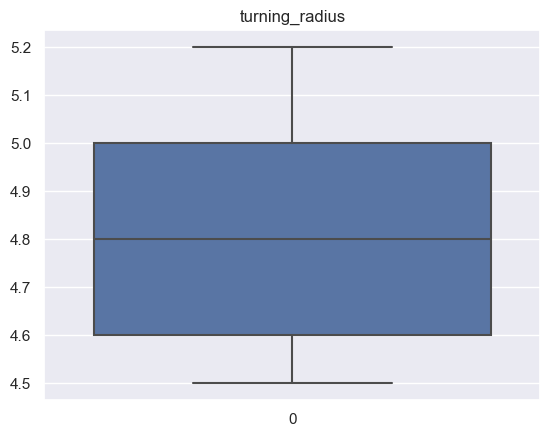

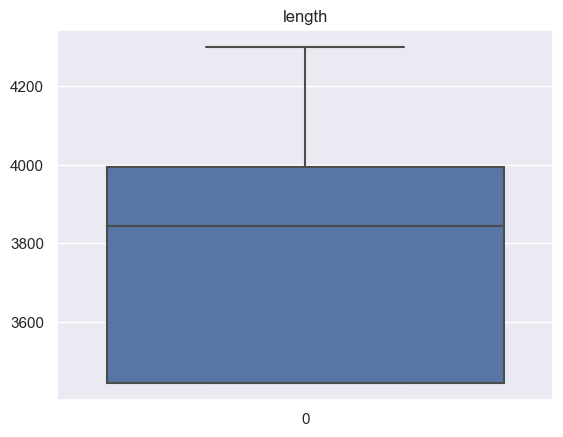

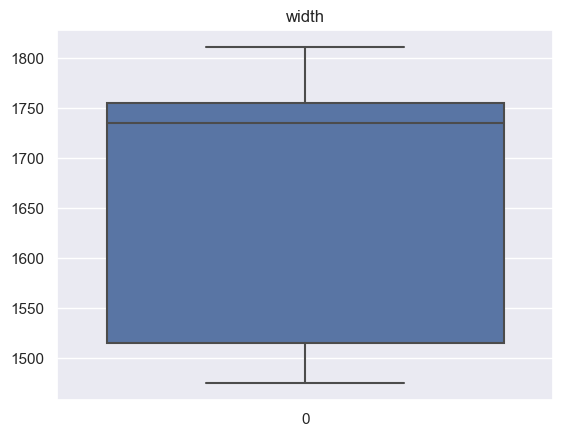

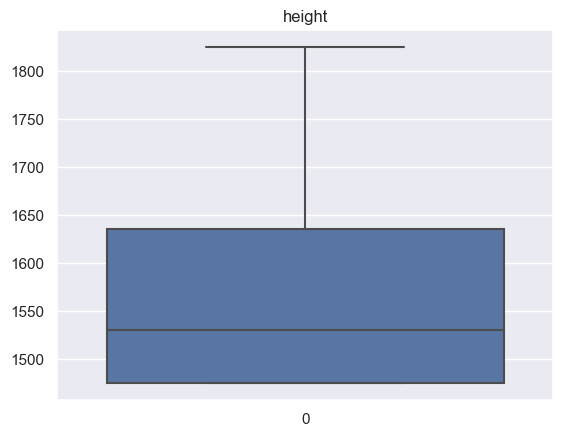

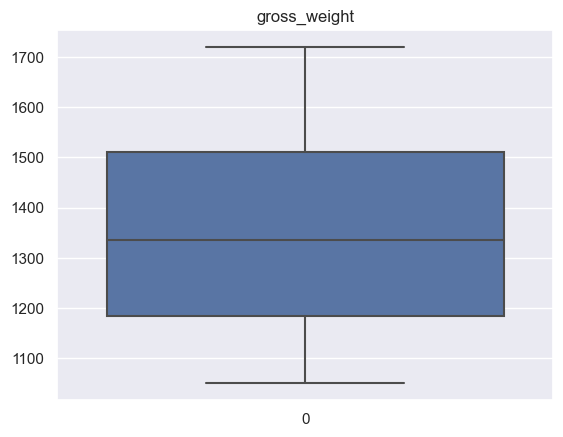

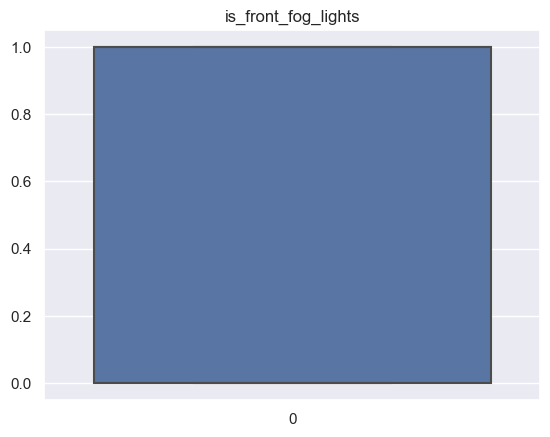

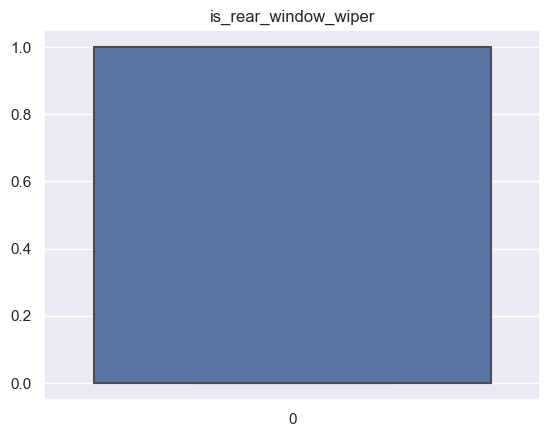

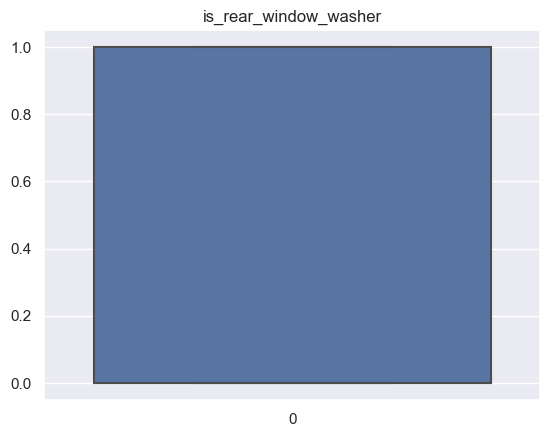

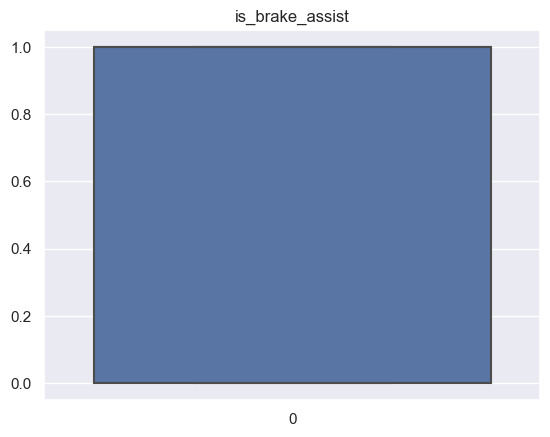

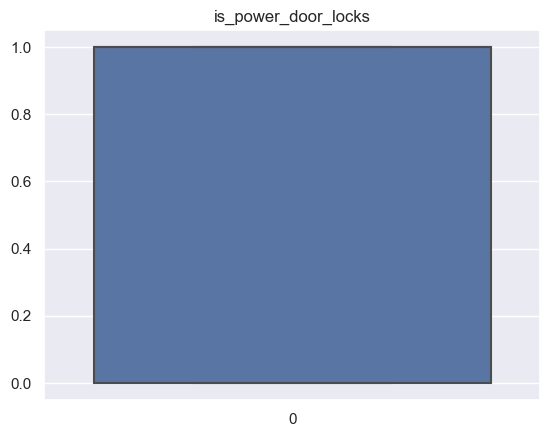

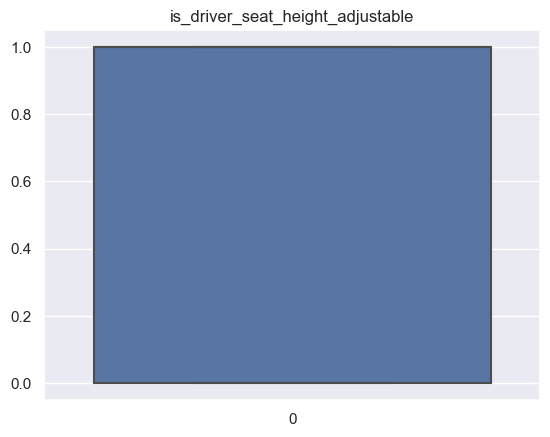

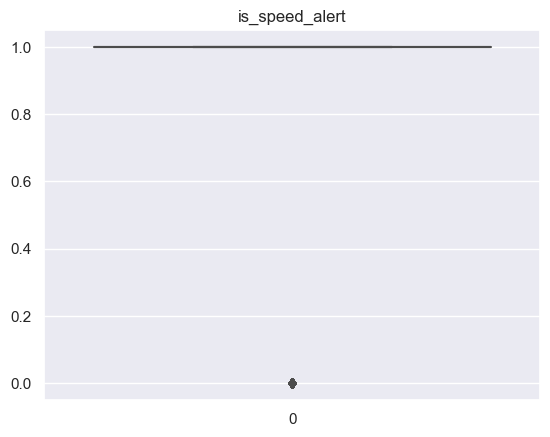

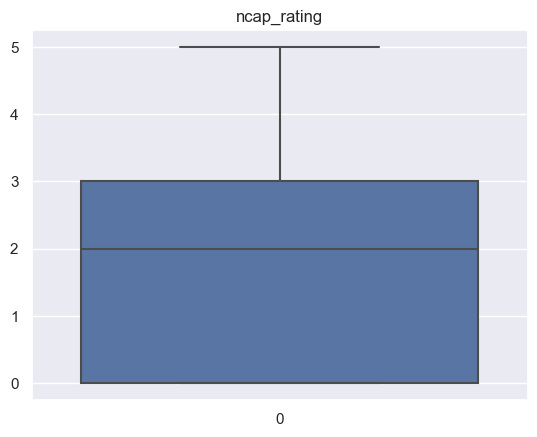

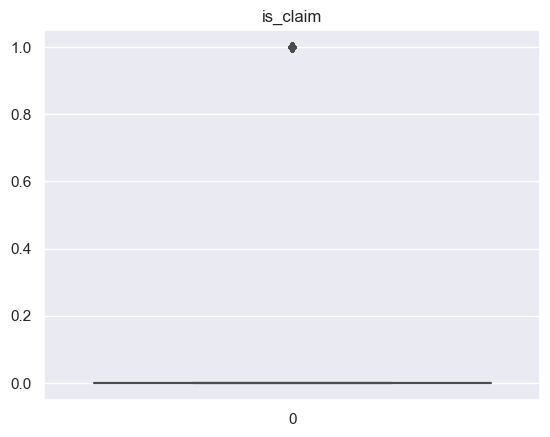

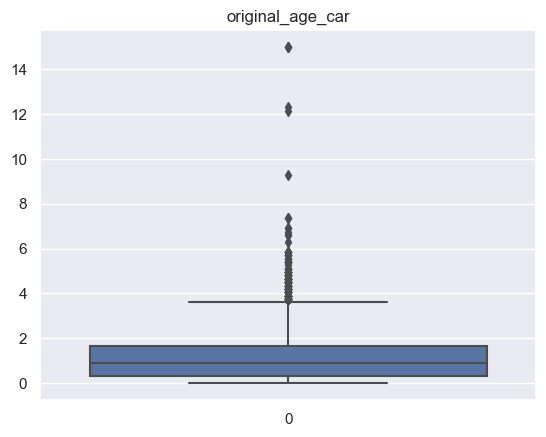

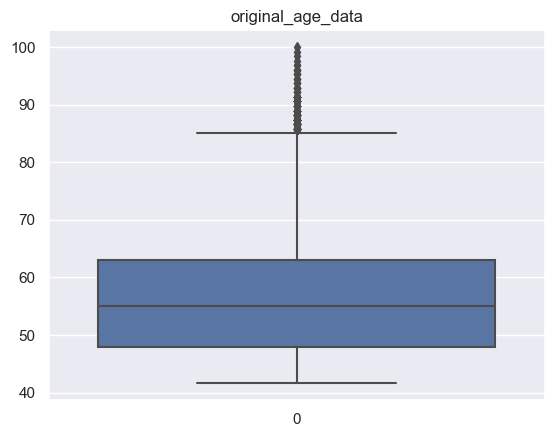

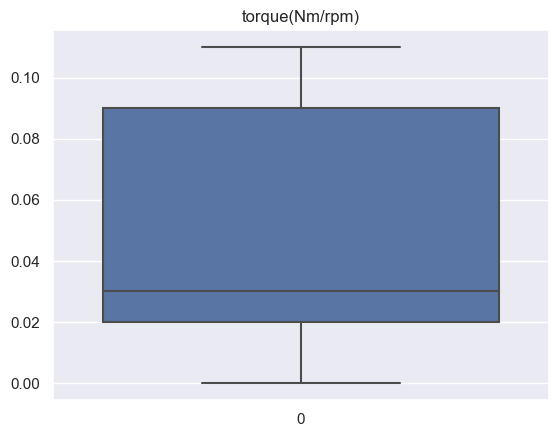

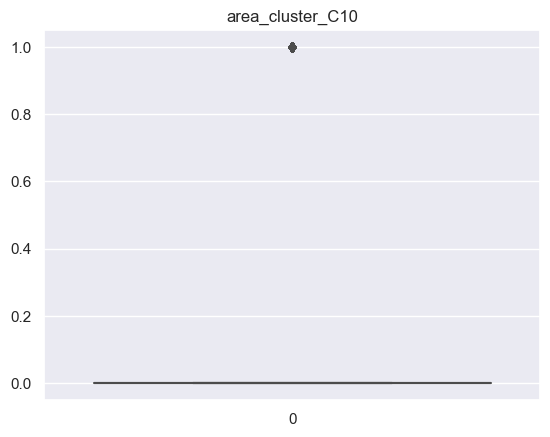

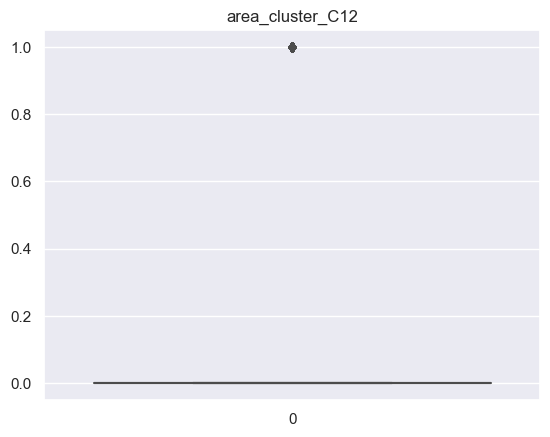

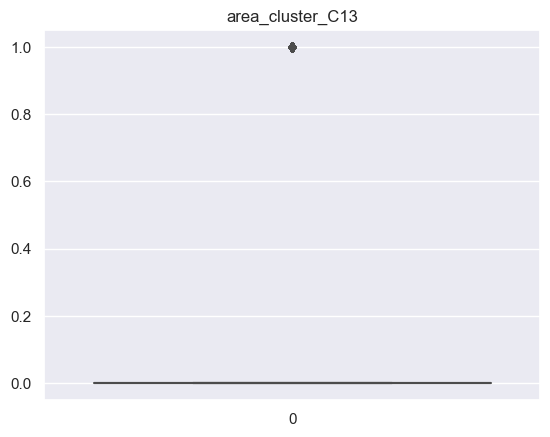

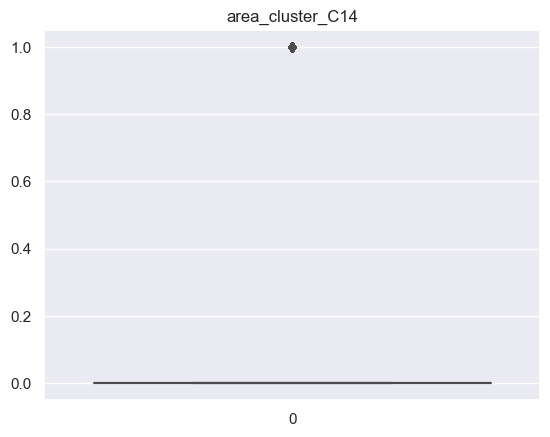

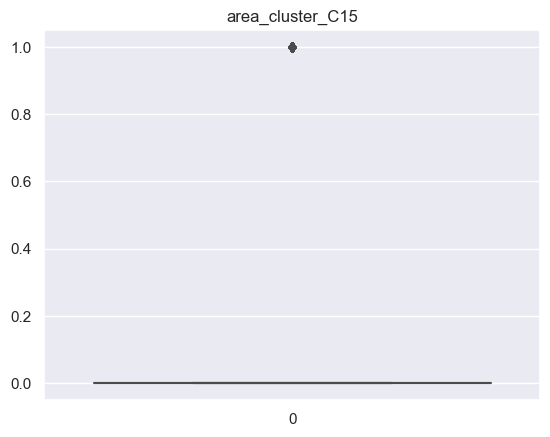

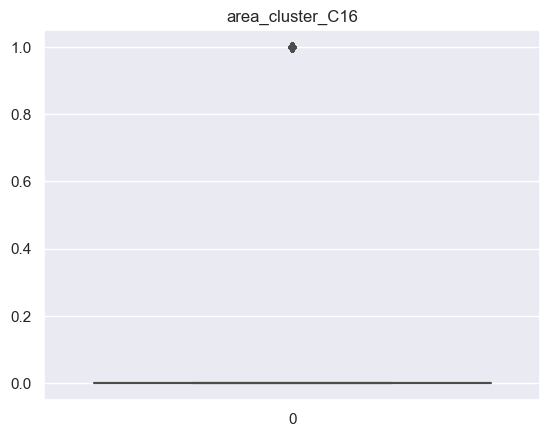

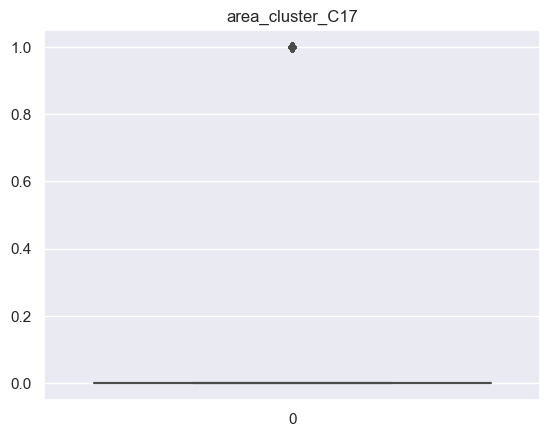

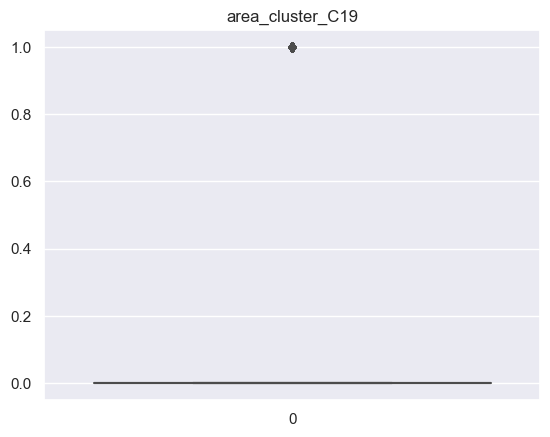

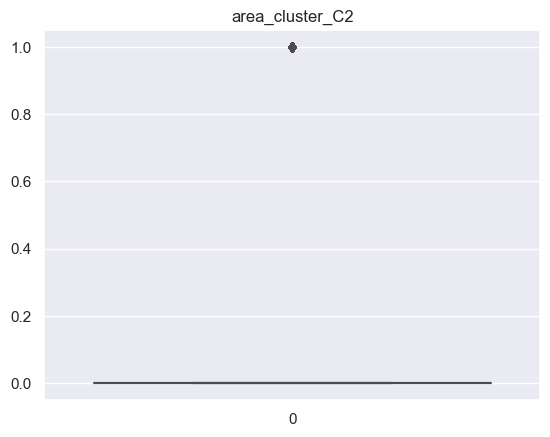

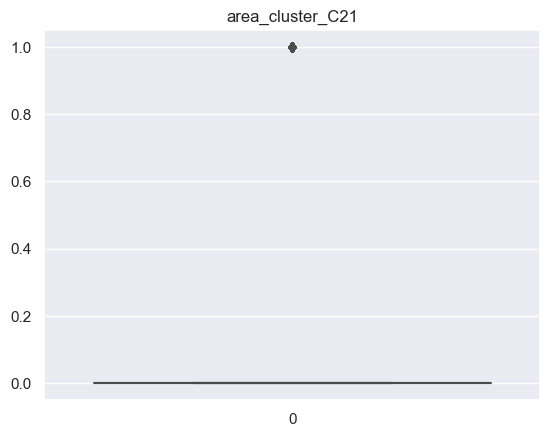

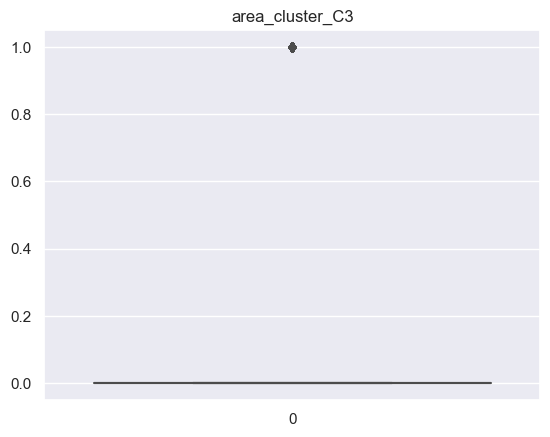

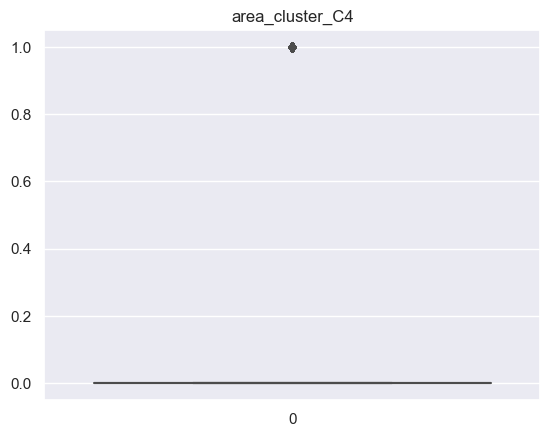

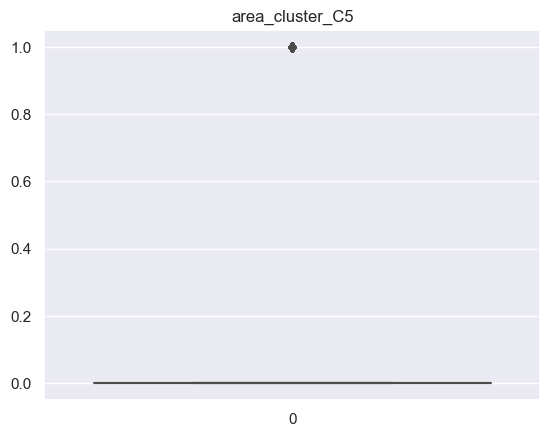

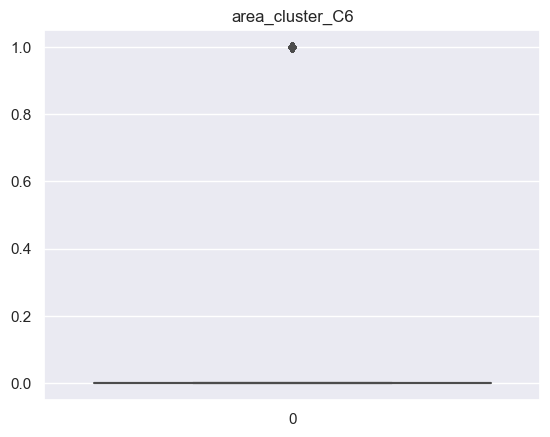

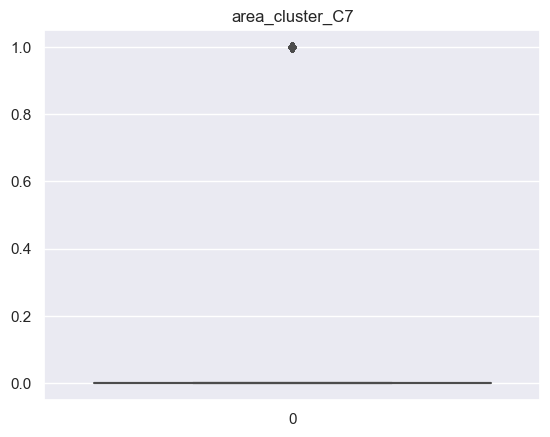

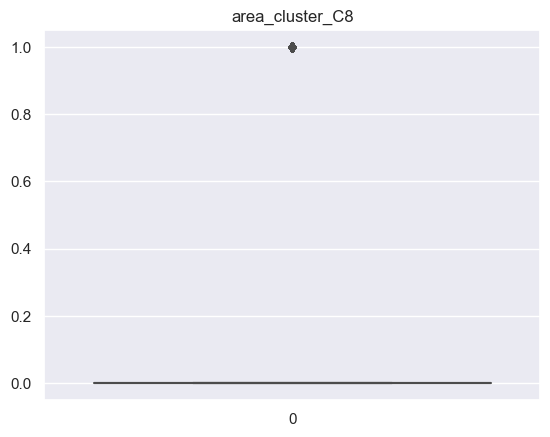

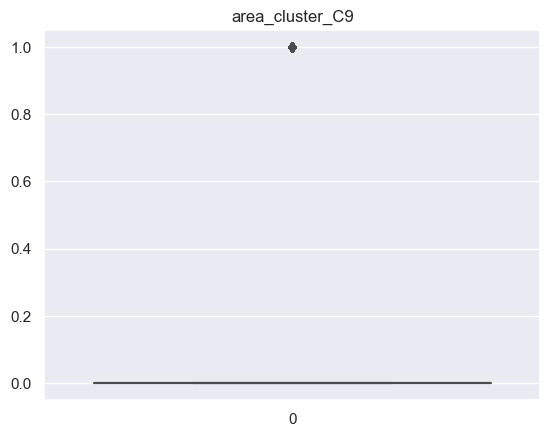

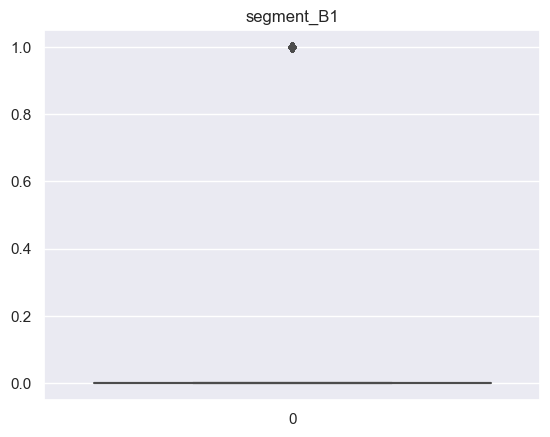

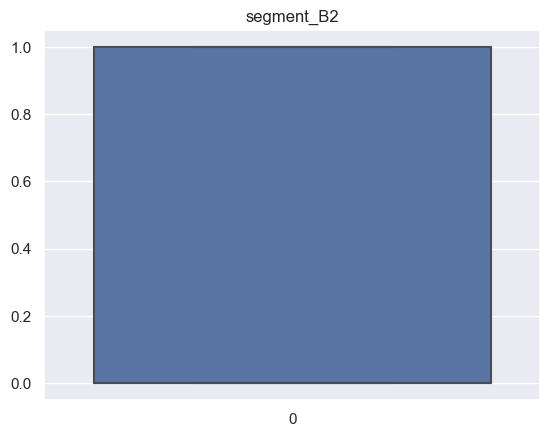

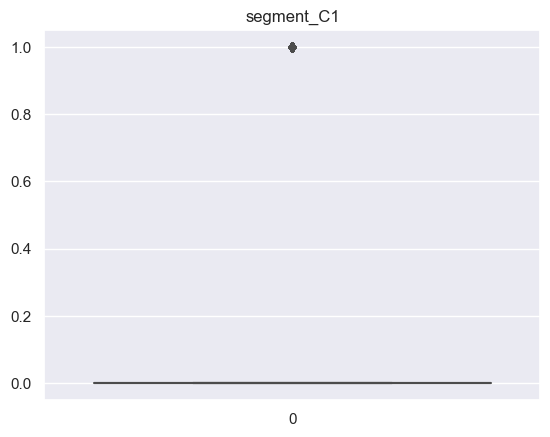

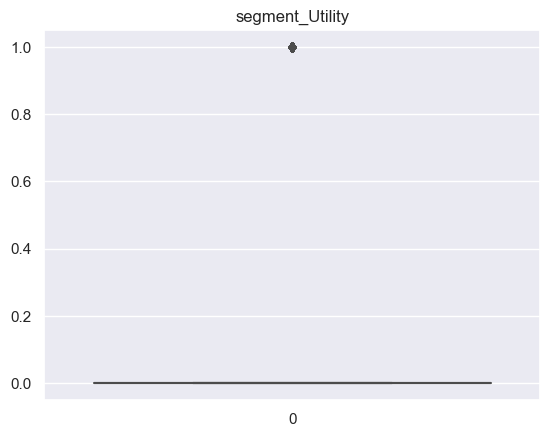

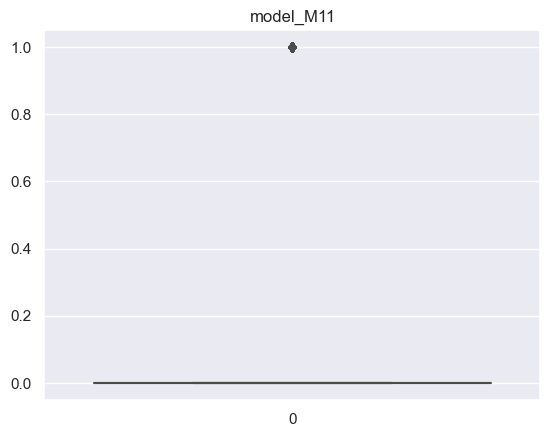

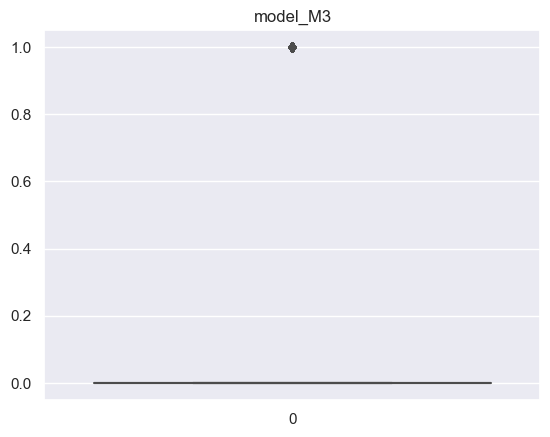

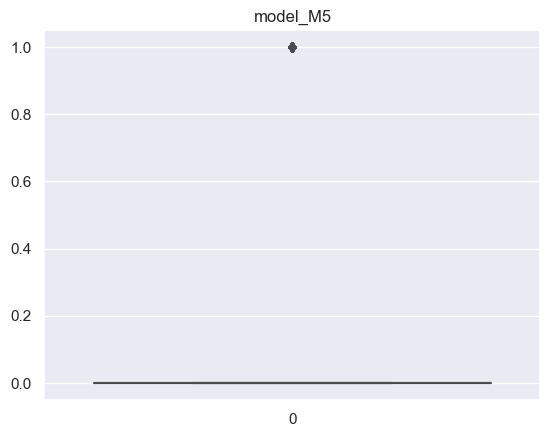

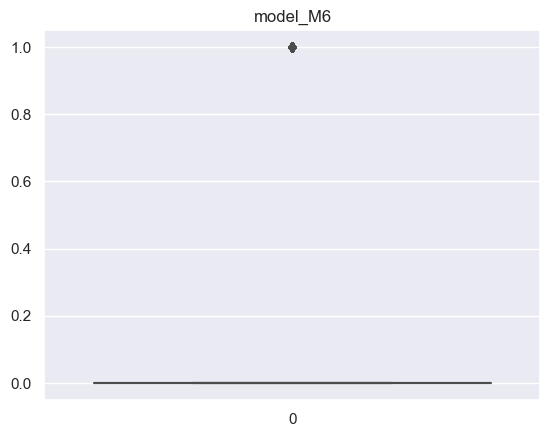

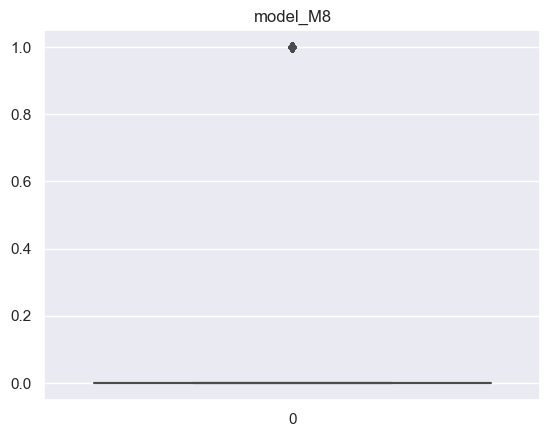

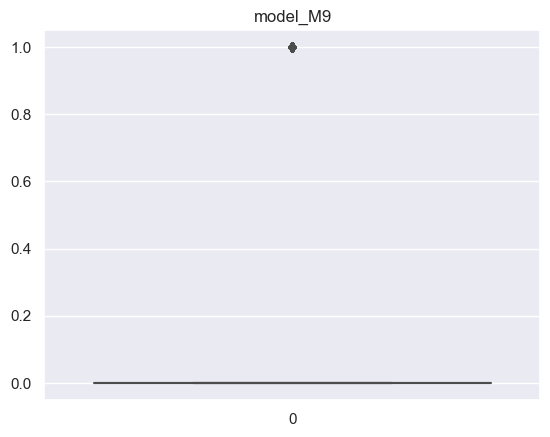

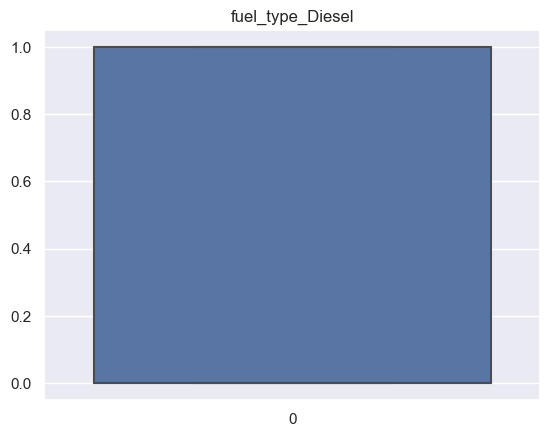

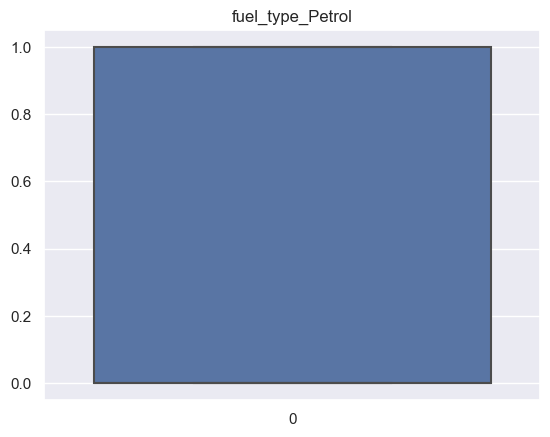

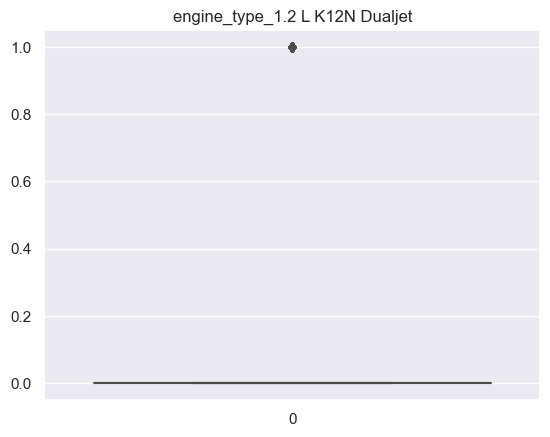

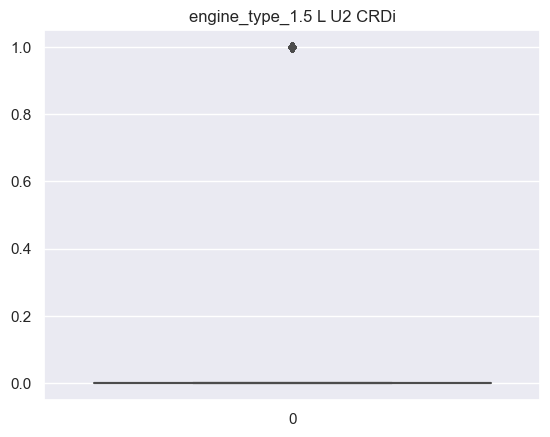

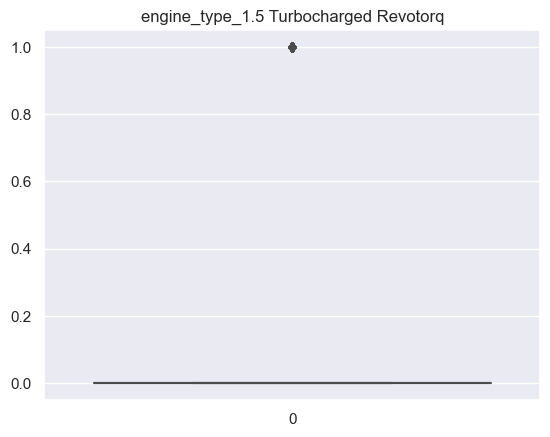

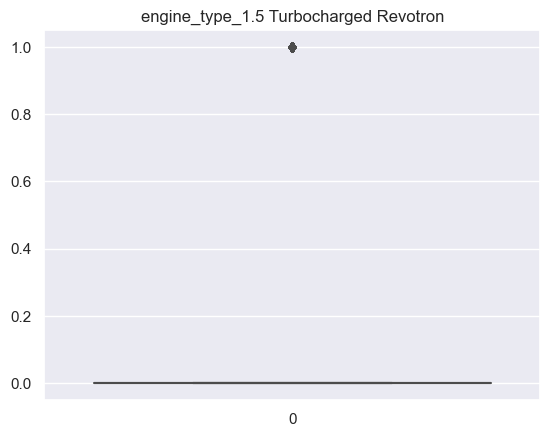

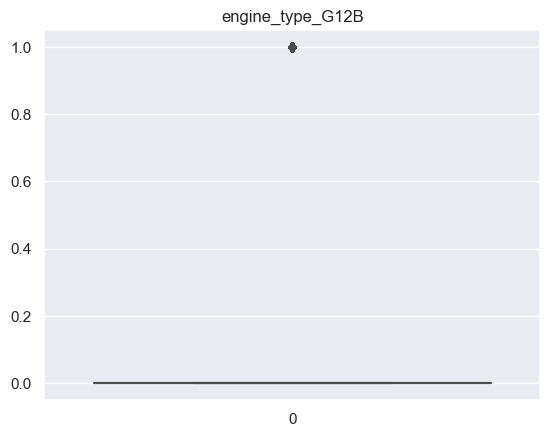

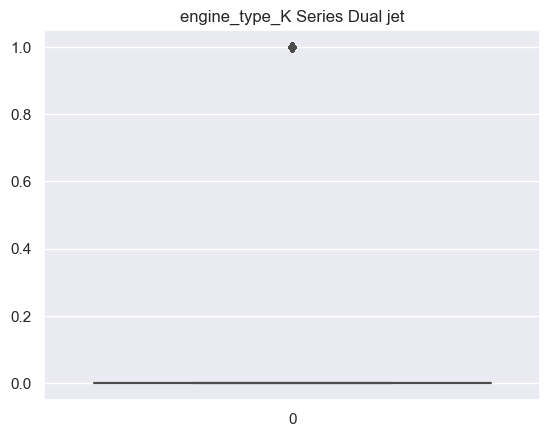

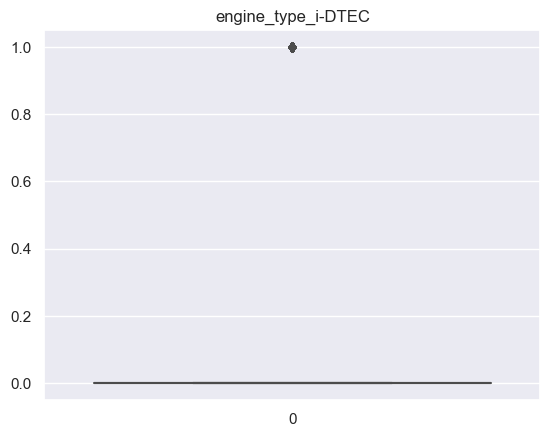

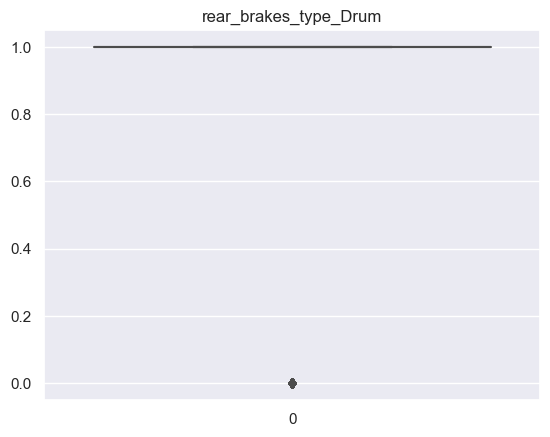

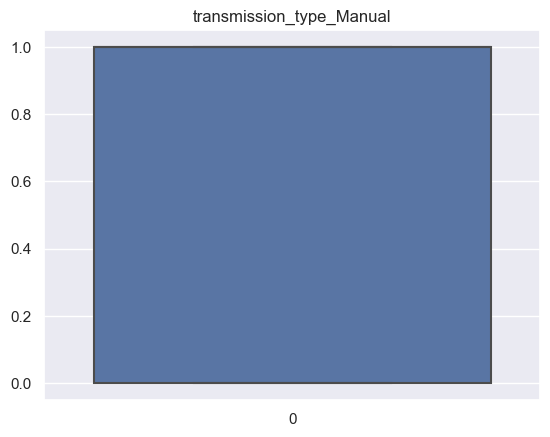

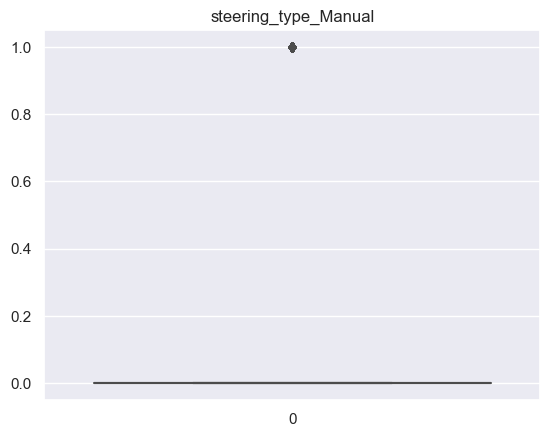

In [64]:
def boxplots(col):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()
    
for i in list(df.select_dtypes(exclude=['object'])):
    boxplots(i)

In [65]:
# From the above boxplots, it can be observed that outliers are present in,
# age_of_car and age_of_policyholder, however this data is scaled
# outliers are present in population_density, however there are likely chances that particular area 
# may be densely populated, hence the outliers from this variable should not be treated

## Check for Imbalanced Dataset

#### is_parking_sensors variable

In [66]:
df['is_parking_sensors'].value_counts()

1    56219
0     2373
Name: is_parking_sensors, dtype: int64

In [67]:
is_parking_sensors_perc = df['is_parking_sensors'].value_counts(normalize=True) * 100

print(is_parking_sensors_perc)

1    95.949959
0     4.050041
Name: is_parking_sensors, dtype: float64


In [68]:
plt.figure(figsize=(6, 4))
sns.barplot(x=is_parking_sensors_perc.index, y=is_parking_sensors_perc.values)
plt.title('Percentage of Vehicles with Parking Sensors')
plt.xlabel('Parking Sensors')
plt.ylabel('Percentage')
plt.show()

#### is_power_steering

In [69]:
df['is_power_steering'].value_counts()

1    57383
0     1209
Name: is_power_steering, dtype: int64

In [70]:
is_power_steering_perc = df['is_power_steering'].value_counts(normalize=True) * 100

print(is_power_steering_perc)

1    97.936578
0     2.063422
Name: is_power_steering, dtype: float64


In [71]:
plt.figure(figsize=(6, 4))
sns.barplot(x=is_power_steering_perc.index, y=is_power_steering_perc.values)
plt.title('Percentage of Vehicles with Power Steering')
plt.xlabel('Power Steering')
plt.ylabel('Percentage')
plt.show()

#### is_speed_alert

In [72]:
df['is_speed_alert'].value_counts()

1    58229
0      363
Name: is_speed_alert, dtype: int64

In [73]:
is_speed_alert_perc = df['is_speed_alert'].value_counts(normalize=True) * 100

print(is_speed_alert_perc)

1    99.380461
0     0.619539
Name: is_speed_alert, dtype: float64


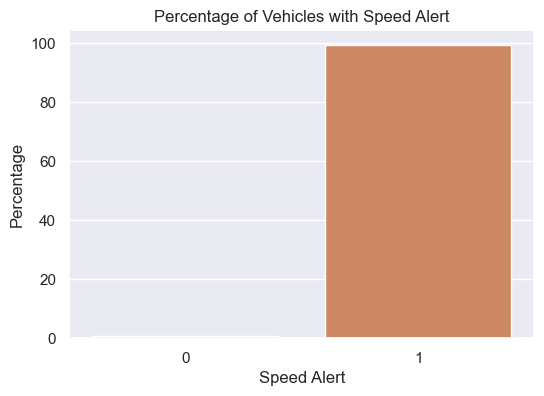

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(x=is_speed_alert_perc.index, y=is_speed_alert_perc.values)
plt.title('Percentage of Vehicles with Speed Alert')
plt.xlabel('Speed Alert')
plt.ylabel('Percentage')
plt.show()

#### is_claim

In [75]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [76]:
is_claim_perc = df['is_claim'].value_counts(normalize=True) * 100

print(is_claim_perc)

0    93.603222
1     6.396778
Name: is_claim, dtype: float64


In [77]:
plt.figure(figsize=(6, 4))
sns.barplot(x=is_claim_perc.index, y=is_claim_perc.values)
plt.title('Percentage of Vehicles with claim')
plt.xlabel('Claim')
plt.ylabel('Percentage')
plt.show()

### Using Principal Componenet Analysis (PCA) for feature selection

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(0.95) # Considering the P value as 0.05 ie. Confidence level 95%
x_pca = pca.fit_transform(x)
print(x.shape)
print(x_pca.shape)

(58592, 86)
(58592, 29)


## Approach - 1 -- Stratification Method

### Splitting data into train and test

In [79]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.25, random_state=101,stratify=y)

### Model Building

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score

In [81]:
# Model 1 - Logistic Regression
logistic = LogisticRegression()
lr = logistic.fit(x_train,y_train)

y_pred_train_lr = logistic.predict(x_train)
y_pred_test_lr = logistic.predict(x_test)

train_accuracy_lr = accuracy_score(y_train,y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test,y_pred_test_lr)

train_precision_lr = precision_score(y_train,y_pred_train_lr)
test_precision_lr = precision_score(y_test,y_pred_test_lr)

train_recall_lr = recall_score(y_train,y_pred_train_lr)
test_recall_lr = recall_score(y_test,y_pred_test_lr)

train_auc_lr = roc_auc_score(y_train,y_pred_train_lr)
test_auc_lr = roc_auc_score(y_test,y_pred_test_lr)

train_f1_lr = f1_score(y_train,y_pred_train_lr)
test_f1_lr = f1_score(y_test,y_pred_test_lr)


In [82]:
print('Training Accuracy Score :',train_accuracy_lr)
print('Test Accuracy Score :',test_accuracy_lr)
print()
print(classification_report(y_train,y_pred_train_lr))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_lr))

Training Accuracy Score : 0.9360322228290552
Test Accuracy Score : 0.9360322228290552

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.00      0.00      0.00      2811

    accuracy                           0.94     43944
   macro avg       0.47      0.50      0.48     43944
weighted avg       0.88      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [83]:
# Model 2 - Decision Tree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

train_accuracy_dt = accuracy_score(y_train,y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test,y_pred_test_dt)

train_precision_dt = precision_score(y_train,y_pred_train_dt)
test_precision_dt = precision_score(y_test,y_pred_test_dt)

train_recall_dt = recall_score(y_train,y_pred_train_dt)
test_recall_dt = recall_score(y_test,y_pred_test_dt)

train_auc_dt = roc_auc_score(y_train,y_pred_train_dt)
test_auc_dt = roc_auc_score(y_test,y_pred_test_dt)

train_f1_dt = f1_score(y_train,y_pred_train_dt)
test_f1_dt = f1_score(y_test,y_pred_test_dt)

In [84]:
print('Training Accuracy Score :',train_accuracy_dt)
print('Test Accuracy Score :',test_accuracy_dt)
print()
print(classification_report(y_train,y_pred_train_dt))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_dt))

Training Accuracy Score : 1.0
Test Accuracy Score : 0.8760240305843802

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41133
           1       1.00      1.00      1.00      2811

    accuracy                           1.00     43944
   macro avg       1.00      1.00      1.00     43944
weighted avg       1.00      1.00      1.00     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13711
           1       0.08      0.09      0.09       937

    accuracy                           0.88     14648
   macro avg       0.51      0.51      0.51     14648
weighted avg       0.88      0.88      0.88     14648



In [85]:
# Model 3 - Random Forest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train,y_train)

y_pred_train_rf = rfmodel.predict(x_train)
y_pred_test_rf = rfmodel.predict(x_test)

train_accuracy_rf = accuracy_score(y_train,y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)

train_precision_rf = precision_score(y_train,y_pred_train_rf)
test_precision_rf = precision_score(y_test,y_pred_test_rf)

train_recall_rf = recall_score(y_train,y_pred_train_rf)
test_recall_rf = recall_score(y_test,y_pred_test_rf)

train_auc_rf = roc_auc_score(y_train,y_pred_train_rf)
test_auc_rf = roc_auc_score(y_test,y_pred_test_rf)

train_f1_rf = f1_score(y_train,y_pred_train_rf)
test_f1_rf = f1_score(y_test,y_pred_test_rf)

In [86]:
print('Training Accuracy Score :',train_accuracy_rf)
print('Test Accuracy Score :',test_accuracy_rf)
print()
print(classification_report(y_train,y_pred_train_rf))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_rf))

Training Accuracy Score : 0.9999089750591662
Test Accuracy Score : 0.932618787547788

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     41133
           1       1.00      1.00      1.00      2811

    accuracy                           1.00     43944
   macro avg       1.00      1.00      1.00     43944
weighted avg       1.00      1.00      1.00     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.08      0.01      0.01       937

    accuracy                           0.93     14648
   macro avg       0.51      0.50      0.49     14648
weighted avg       0.88      0.93      0.90     14648



In [87]:
# Model 4 - Bagging Classifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train,y_train)

y_pred_train_bg = bagg.predict(x_train)
y_pred_test_bg = bagg.predict(x_test)

train_accuracy_bg = accuracy_score(y_train,y_pred_train_bg)
test_accuracy_bg = accuracy_score(y_test,y_pred_test_bg)

train_precision_bg = precision_score(y_train,y_pred_train_bg)
test_precision_bg = precision_score(y_test,y_pred_test_bg)

train_recall_bg = recall_score(y_train,y_pred_train_bg)
test_recall_bg = recall_score(y_test,y_pred_test_bg)

train_auc_bg = roc_auc_score(y_train,y_pred_train_bg)
test_auc_bg = roc_auc_score(y_test,y_pred_test_bg)

train_f1_bg = f1_score(y_train,y_pred_train_bg)
test_f1_bg = f1_score(y_test,y_pred_test_bg)

In [88]:
print('Training Accuracy Score :',train_accuracy_bg)
print('Test Accuracy Score :',test_accuracy_bg)
print()
print(classification_report(y_train,y_pred_train_bg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_bg))

Training Accuracy Score : 0.9855725468778446
Test Accuracy Score : 0.9306389950846532

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     41133
           1       1.00      0.78      0.87      2811

    accuracy                           0.99     43944
   macro avg       0.99      0.89      0.93     43944
weighted avg       0.99      0.99      0.98     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     13711
           1       0.08      0.01      0.02       937

    accuracy                           0.93     14648
   macro avg       0.51      0.50      0.49     14648
weighted avg       0.88      0.93      0.90     14648



In [89]:
# Model 5 - AdaaBoost Classifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train,y_train)

y_pred_train_ad = ada.predict(x_train)
y_pred_test_ad = ada.predict(x_test)

train_accuracy_ad = accuracy_score(y_train,y_pred_train_ad)
test_accuracy_ad = accuracy_score(y_test,y_pred_test_ad)

train_precision_ad = precision_score(y_train,y_pred_train_ad)
test_precision_ad = precision_score(y_test,y_pred_test_ad)

train_recall_ad = recall_score(y_train,y_pred_train_ad)
test_recall_ad = recall_score(y_test,y_pred_test_ad)

train_auc_ad = roc_auc_score(y_train,y_pred_train_ad)
test_auc_ad = roc_auc_score(y_test,y_pred_test_ad)

train_f1_ad = f1_score(y_train,y_pred_train_ad)
test_f1_ad = f1_score(y_test,y_pred_test_ad)

In [90]:
print('Training Accuracy Score :',train_accuracy_ad)
print('Test Accuracy Score :',test_accuracy_ad)
print()
print(classification_report(y_train,y_pred_train_ad))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_ad))

Training Accuracy Score : 0.9360322228290552
Test Accuracy Score : 0.9360322228290552

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.00      0.00      0.00      2811

    accuracy                           0.94     43944
   macro avg       0.47      0.50      0.48     43944
weighted avg       0.88      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [91]:
# Model 6 - Gradient Boosting Classifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)

y_pred_train_gd = gdb.predict(x_train)
y_pred_test_gd = gdb.predict(x_test)

train_accuracy_gd = accuracy_score(y_train,y_pred_train_gd)
test_accuracy_gd = accuracy_score(y_test,y_pred_test_gd)

train_precision_gd = precision_score(y_train,y_pred_train_gd)
test_precision_gd = precision_score(y_test,y_pred_test_gd)

train_recall_gd = recall_score(y_train,y_pred_train_gd)
test_recall_gd = recall_score(y_test,y_pred_test_gd)

train_auc_gd = roc_auc_score(y_train,y_pred_train_gd)
test_auc_gd = roc_auc_score(y_test,y_pred_test_gd)

train_f1_gd = f1_score(y_train,y_pred_train_gd)
test_f1_gd = f1_score(y_test,y_pred_test_gd)

In [92]:
print('Training Accuracy Score :',train_accuracy_gd)
print('Test Accuracy Score :',test_accuracy_gd)
print()
print(classification_report(y_train,y_pred_train_gd))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_gd))

Training Accuracy Score : 0.9362142727107228
Test Accuracy Score : 0.9358956854178044

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       1.00      0.00      0.01      2811

    accuracy                           0.94     43944
   macro avg       0.97      0.50      0.49     43944
weighted avg       0.94      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [93]:
# Model 7 - XG Boosting Classifier
xgb = GradientBoostingClassifier()
xg = xgb.fit(x_train,y_train)

y_pred_train_xg = xgb.predict(x_train)
y_pred_test_xg = xgb.predict(x_test)

train_accuracy_xg = accuracy_score(y_train,y_pred_train_xg)
test_accuracy_xg = accuracy_score(y_test,y_pred_test_xg)

train_precision_xg = precision_score(y_train,y_pred_train_xg)
test_precision_xg = precision_score(y_test,y_pred_test_xg)

train_recall_xg = recall_score(y_train,y_pred_train_xg)
test_recall_xg = recall_score(y_test,y_pred_test_xg)

train_auc_xg = roc_auc_score(y_train,y_pred_train_xg)
test_auc_xg = roc_auc_score(y_test,y_pred_test_xg)

train_f1_xg = f1_score(y_train,y_pred_train_xg)
test_f1_xg = f1_score(y_test,y_pred_test_xg)

In [94]:
print('Training Accuracy Score :',train_accuracy_xg)
print('Test Accuracy Score :',test_accuracy_xg)
print()
print(classification_report(y_train,y_pred_train_xg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_xg))

Training Accuracy Score : 0.9362142727107228
Test Accuracy Score : 0.9358956854178044

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       1.00      0.00      0.01      2811

    accuracy                           0.94     43944
   macro avg       0.97      0.50      0.49     43944
weighted avg       0.94      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [95]:
# Model 8 - SVC Classifier
svc = SVC()
sv = svc.fit(x_train,y_train)

y_pred_train_sv = svc.predict(x_train)
y_pred_test_sv = svc.predict(x_test)

train_accuracy_sv = accuracy_score(y_train,y_pred_train_sv)
test_accuracy_sv = accuracy_score(y_test,y_pred_test_sv)

train_precision_sv = precision_score(y_train,y_pred_train_sv)
test_precision_sv = precision_score(y_test,y_pred_test_sv)

train_recall_sv = recall_score(y_train,y_pred_train_sv)
test_recall_sv = recall_score(y_test,y_pred_test_sv)

train_auc_sv = roc_auc_score(y_train,y_pred_train_sv)
test_auc_sv = roc_auc_score(y_test,y_pred_test_sv)

train_f1_sv = f1_score(y_train,y_pred_train_sv)
test_f1_sv = f1_score(y_test,y_pred_test_sv)

In [96]:
print('Training Accuracy Score :',train_accuracy_sv)
print('Test Accuracy Score :',test_accuracy_sv)
print()
print(classification_report(y_train,y_pred_train_sv))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_sv))

Training Accuracy Score : 0.9360322228290552
Test Accuracy Score : 0.9360322228290552

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.00      0.00      0.00      2811

    accuracy                           0.94     43944
   macro avg       0.47      0.50      0.48     43944
weighted avg       0.88      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [97]:
# Model 9 - KNN Classifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

y_pred_train_kn = knn.predict(x_train)
y_pred_test_kn = knn.predict(x_test)

train_accuracy_kn = accuracy_score(y_train,y_pred_train_kn)
test_accuracy_kn = accuracy_score(y_test,y_pred_test_kn)

train_precision_kn = precision_score(y_train,y_pred_train_kn)
test_precision_kn = precision_score(y_test,y_pred_test_kn)

train_recall_kn = recall_score(y_train,y_pred_train_kn)
test_recall_kn = recall_score(y_test,y_pred_test_kn)

train_auc_kn = roc_auc_score(y_train,y_pred_train_kn)
test_auc_kn = roc_auc_score(y_test,y_pred_test_kn)

train_f1_kn = f1_score(y_train,y_pred_train_kn)
test_f1_kn = f1_score(y_test,y_pred_test_kn)

In [98]:
print('Training Accuracy Score :',train_accuracy_kn)
print('Test Accuracy Score :',test_accuracy_kn)
print()
print(classification_report(y_train,y_pred_train_kn))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_kn))

Training Accuracy Score : 0.9367149098853086
Test Accuracy Score : 0.9336428181321682

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.59      0.04      0.07      2811

    accuracy                           0.94     43944
   macro avg       0.76      0.52      0.52     43944
weighted avg       0.92      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.14      0.01      0.01       937

    accuracy                           0.93     14648
   macro avg       0.54      0.50      0.49     14648
weighted avg       0.89      0.93      0.90     14648



In [99]:
# Model 10 - Naive Bayes Theorem - Bernouli
naive_nb = BernoulliNB()
nb = naive_nb.fit(x_train,y_train)

y_pred_train_nb = naive_nb.predict(x_train)
y_pred_test_nb = naive_nb.predict(x_test)

train_accuracy_nb = accuracy_score(y_train,y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test,y_pred_test_nb)

train_precision_nb = precision_score(y_train,y_pred_train_nb)
test_precision_nb = precision_score(y_test,y_pred_test_nb)

train_recall_nb = recall_score(y_train,y_pred_train_nb)
test_recall_nb = recall_score(y_test,y_pred_test_nb)

train_auc_nb = roc_auc_score(y_train,y_pred_train_nb)
test_auc_nb = roc_auc_score(y_test,y_pred_test_nb)

train_f1_nb = f1_score(y_train,y_pred_train_nb)
test_f1_nb = f1_score(y_test,y_pred_test_nb)

In [100]:
print('Training Accuracy Score :',train_accuracy_nb)
print('Test Accuracy Score :',test_accuracy_nb)
print()
print(classification_report(y_train,y_pred_train_nb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_nb))

Training Accuracy Score : 0.9360322228290552
Test Accuracy Score : 0.9360322228290552

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41133
           1       0.00      0.00      0.00      2811

    accuracy                           0.94     43944
   macro avg       0.47      0.50      0.48     43944
weighted avg       0.88      0.94      0.91     43944

*********************************************************************
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13711
           1       0.00      0.00      0.00       937

    accuracy                           0.94     14648
   macro avg       0.47      0.50      0.48     14648
weighted avg       0.88      0.94      0.91     14648



In [101]:
list1=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging','Adaboost','GradientBoosting','XGBoost',
      'Support Vector', 'KNearestNeighbour','NaiveBayesBernoulli']

list2 = [train_accuracy_lr,train_accuracy_dt, train_accuracy_rf,train_accuracy_bg,train_accuracy_ad,
         train_accuracy_gd,train_accuracy_xg,train_accuracy_sv,train_accuracy_kn,train_accuracy_nb]

list3 = [test_accuracy_lr,test_accuracy_dt, test_accuracy_rf,test_accuracy_bg,test_accuracy_ad,
         test_accuracy_gd,test_accuracy_xg,test_accuracy_sv,test_accuracy_kn,test_accuracy_nb]

list4 = [train_precision_lr,train_precision_dt, train_precision_rf,train_precision_bg,train_precision_ad,
         train_precision_gd,train_precision_xg,train_precision_sv,train_precision_kn,train_precision_nb]

list5 = [test_precision_lr,test_precision_dt, test_precision_rf,test_precision_bg,test_precision_ad,
         test_precision_gd,test_precision_xg,test_precision_sv,test_precision_kn,test_precision_nb]

list6 = [train_recall_lr,train_recall_dt, train_recall_rf,train_recall_bg,train_recall_ad,
         train_recall_gd,train_recall_xg,train_recall_sv,train_recall_kn,train_recall_nb]

list7 = [test_recall_lr,test_recall_dt, test_recall_rf,test_recall_bg,test_recall_ad,
         test_recall_gd,test_recall_xg,test_recall_sv,test_recall_kn,test_recall_nb]

list8 = [train_auc_lr,train_auc_dt, train_auc_rf,train_auc_bg,train_auc_ad,
         train_auc_gd,train_auc_xg,train_auc_sv,train_auc_kn,train_auc_nb]

list9 = [test_auc_lr,test_auc_dt, test_auc_rf,test_auc_bg,test_auc_ad,
         test_auc_gd,test_auc_xg,test_auc_sv,test_auc_kn,test_auc_nb]

list10 = [train_f1_lr,train_f1_dt, train_f1_rf,train_f1_bg,train_f1_ad,
         train_f1_gd,train_f1_xg,train_f1_sv,train_f1_kn,train_f1_nb]

list11 = [test_f1_lr,test_f1_dt, test_f1_rf,test_f1_bg,test_f1_ad,
         test_f1_gd,test_f1_xg,test_f1_sv,test_f1_kn,test_f1_nb]

list15 = [logistic,dtree,rfmodel,bagg,ada,gdb,xgb,svc,knn,naive_nb]


final_accuracy = pd.DataFrame({'Method Used': list1,'Train_Accuracy': list2,'Test_Accuracy': list3,
                               'Train_Precision': list4,'Test_Precision': list5,
                              'Train_Recall': list6,'Test_Recall': list7,
                              'Train_AUC': list8,'Test_AUC': list9,
                              'Train_F1': list10,'Test_F1': list11})
print(final_accuracy)

           Method Used  Train_Accuracy  Test_Accuracy  Train_Precision  \
0  Logistic Regression        0.936032       0.936032         0.000000   
1        Decision Tree        1.000000       0.876024         1.000000   
2        Random Forest        0.999909       0.932619         1.000000   
3              Bagging        0.985573       0.930639         0.998626   
4             Adaboost        0.936032       0.936032         0.000000   
5     GradientBoosting        0.936214       0.935896         1.000000   
6              XGBoost        0.936214       0.935896         1.000000   
7       Support Vector        0.936032       0.936032         0.000000   
8    KNearestNeighbour        0.936715       0.933643         0.585227   
9  NaiveBayesBernoulli        0.936032       0.936032         0.000000   

   Test_Precision  Train_Recall  Test_Recall  Train_AUC  Test_AUC  Train_F1  \
0        0.000000      0.000000     0.000000   0.500000  0.500000  0.000000   
1        0.083412      1.00

In [103]:

final_accuracy.plot(kind='bar',x='Method Used',figsize=(12,6),width=0.8)
plt.legend(title='Accuracy Type', loc='best',ncols=5,fontsize='x-small')
plt.title('Train and Test Accuracy for Different Methods')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method Used')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [105]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their distributions
param_dist = {'n_neighbors': randint(1, 20)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(knn, param_dist, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_k = random_search.best_params_['n_neighbors']


In [106]:
print(best_k)

19


In [214]:
# Model - KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=19)
knb = knn_best.fit(x_train,y_train)

y_pred_train_knb = knn_best.predict(x_train)
y_pred_test_knb = knn_best.predict(x_test)

train_accuracy_knb = accuracy_score(y_train,y_pred_train_knb)
test_accuracy_knb = accuracy_score(y_test,y_pred_test_knb)

train_precision_knb = precision_score(y_train,y_pred_train_knb)
test_precision_knb = precision_score(y_test,y_pred_test_knb)

train_recall_knb = recall_score(y_train,y_pred_train_knb)
test_recall_knb = recall_score(y_test,y_pred_test_knb)

train_auc_knb = roc_auc_score(y_train,y_pred_train_knb)
test_auc_knb = roc_auc_score(y_test,y_pred_test_knb)

train_f1_knb = f1_score(y_train,y_pred_train_knb)
test_f1_knb = f1_score(y_test,y_pred_test_knb)

In [215]:
print('Training Accuracy Score :',train_accuracy_knb)
print('Test Accuracy Score :',test_accuracy_knb)
print()
print(classification_report(y_train,y_pred_train_knb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_knb))

Training Accuracy Score : 0.758051282051282
Test Accuracy Score : 0.7266842920959067

              precision    recall  f1-score   support

           0       0.91      0.57      0.70     43752
           1       0.69      0.94      0.80     43998

    accuracy                           0.76     87750
   macro avg       0.80      0.76      0.75     87750
weighted avg       0.80      0.76      0.75     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.86      0.55      0.67     11092
           1       0.66      0.91      0.77     10846

    accuracy                           0.73     21938
   macro avg       0.76      0.73      0.72     21938
weighted avg       0.76      0.73      0.72     21938



## Approach 2 - Using Oversampling Method

In [109]:
x= df.drop(columns='is_claim')
y= df[['is_claim']]

In [110]:
# The data is highly imbalanced and need to be balanced by
# Random UnderSampling, Random Oversampling, SMOTE

In [112]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print(y_ros.value_counts())

is_claim
0           54844
1            3748
dtype: int64
is_claim
0           54844
1           54844
dtype: int64


In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_ros)

In [114]:

from sklearn.decomposition import PCA

pca = PCA(0.95) # Considering the P value as 0.05 ie. Confidence level 95%
x_pca = pca.fit_transform(x_sc)
print(x.shape)
print(x_pca.shape)

(58592, 86)
(109688, 29)


In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca,y_ros,test_size=0.2, random_state=42)

In [116]:
# Model 1 - Logistic Regression
logistic = LogisticRegression()
lr = logistic.fit(x_train,y_train)

y_pred_train_lr = logistic.predict(x_train)
y_pred_test_lr = logistic.predict(x_test)

train_accuracy_lr = accuracy_score(y_train,y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test,y_pred_test_lr)

train_precision_lr = precision_score(y_train,y_pred_train_lr)
test_precision_lr = precision_score(y_test,y_pred_test_lr)

train_recall_lr = recall_score(y_train,y_pred_train_lr)
test_recall_lr = recall_score(y_test,y_pred_test_lr)

train_auc_lr = roc_auc_score(y_train,y_pred_train_lr)
test_auc_lr = roc_auc_score(y_test,y_pred_test_lr)

train_f1_lr = f1_score(y_train,y_pred_train_lr)
test_f1_lr = f1_score(y_test,y_pred_test_lr)


In [117]:
print('Training Accuracy Score :',train_accuracy_lr)
print('Test Accuracy Score :',test_accuracy_lr)
print()
print(classification_report(y_train,y_pred_train_lr))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_lr))

Training Accuracy Score : 0.5621082621082621
Test Accuracy Score : 0.5636794602972012

              precision    recall  f1-score   support

           0       0.57      0.53      0.55     43752
           1       0.56      0.60      0.58     43998

    accuracy                           0.56     87750
   macro avg       0.56      0.56      0.56     87750
weighted avg       0.56      0.56      0.56     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.57      0.53      0.55     11092
           1       0.55      0.60      0.58     10846

    accuracy                           0.56     21938
   macro avg       0.56      0.56      0.56     21938
weighted avg       0.56      0.56      0.56     21938



In [118]:
# Model 2 - Decision Tree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

train_accuracy_dt = accuracy_score(y_train,y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test,y_pred_test_dt)

train_precision_dt = precision_score(y_train,y_pred_train_dt)
test_precision_dt = precision_score(y_test,y_pred_test_dt)

train_recall_dt = recall_score(y_train,y_pred_train_dt)
test_recall_dt = recall_score(y_test,y_pred_test_dt)

train_auc_dt = roc_auc_score(y_train,y_pred_train_dt)
test_auc_dt = roc_auc_score(y_test,y_pred_test_dt)

train_f1_dt = f1_score(y_train,y_pred_train_dt)
test_f1_dt = f1_score(y_test,y_pred_test_dt)

In [119]:
print('Training Accuracy Score :',train_accuracy_dt)
print('Test Accuracy Score :',test_accuracy_nb)
print()
print(classification_report(y_train,y_pred_train_dt))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_dt))

Training Accuracy Score : 1.0
Test Accuracy Score : 0.9360322228290552

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11092
           1       0.93      1.00      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938



In [120]:
# Model 3 - Random Forest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train,y_train)

y_pred_train_rf = rfmodel.predict(x_train)
y_pred_test_rf = rfmodel.predict(x_test)

train_accuracy_rf = accuracy_score(y_train,y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)

train_precision_rf = precision_score(y_train,y_pred_train_rf)
test_precision_rf = precision_score(y_test,y_pred_test_rf)

train_recall_rf = recall_score(y_train,y_pred_train_rf)
test_recall_rf = recall_score(y_test,y_pred_test_rf)

train_auc_rf = roc_auc_score(y_train,y_pred_train_rf)
test_auc_rf = roc_auc_score(y_test,y_pred_test_rf)

train_f1_rf = f1_score(y_train,y_pred_train_rf)
test_f1_rf = f1_score(y_test,y_pred_test_rf)

In [121]:
print('Training Accuracy Score :',train_accuracy_rf)
print('Test Accuracy Score :',test_accuracy_rf)
print()
print(classification_report(y_train,y_pred_train_rf))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_rf))

Training Accuracy Score : 1.0
Test Accuracy Score : 0.9844106117239493

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11092
           1       0.97      1.00      0.98     10846

    accuracy                           0.98     21938
   macro avg       0.98      0.98      0.98     21938
weighted avg       0.98      0.98      0.98     21938



In [122]:
# Model 4 - Bagging Classifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train,y_train)

y_pred_train_bg = bagg.predict(x_train)
y_pred_test_bg = bagg.predict(x_test)

train_accuracy_bg = accuracy_score(y_train,y_pred_train_bg)
test_accuracy_bg = accuracy_score(y_test,y_pred_test_bg)

train_precision_bg = precision_score(y_train,y_pred_train_bg)
test_precision_bg = precision_score(y_test,y_pred_test_bg)

train_recall_bg = recall_score(y_train,y_pred_train_bg)
test_recall_bg = recall_score(y_test,y_pred_test_bg)

train_auc_bg = roc_auc_score(y_train,y_pred_train_bg)
test_auc_bg = roc_auc_score(y_test,y_pred_test_bg)

train_f1_bg = f1_score(y_train,y_pred_train_bg)
test_f1_bg = f1_score(y_test,y_pred_test_bg)

In [123]:
print('Training Accuracy Score :',train_accuracy_bg)
print('Test Accuracy Score :',test_accuracy_bg)
print()
print(classification_report(y_train,y_pred_train_bg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_bg))

Training Accuracy Score : 0.9996467236467237
Test Accuracy Score : 0.9823137934178139

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11092
           1       0.97      1.00      0.98     10846

    accuracy                           0.98     21938
   macro avg       0.98      0.98      0.98     21938
weighted avg       0.98      0.98      0.98     21938



In [124]:
# Model 5 - AdaaBoost Classifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train,y_train)

y_pred_train_ad = ada.predict(x_train)
y_pred_test_ad = ada.predict(x_test)

train_accuracy_ad = accuracy_score(y_train,y_pred_train_ad)
test_accuracy_ad = accuracy_score(y_test,y_pred_test_ad)

train_precision_ad = precision_score(y_train,y_pred_train_ad)
test_precision_ad = precision_score(y_test,y_pred_test_ad)

train_recall_ad = recall_score(y_train,y_pred_train_ad)
test_recall_ad = recall_score(y_test,y_pred_test_ad)

train_auc_ad = roc_auc_score(y_train,y_pred_train_ad)
test_auc_ad = roc_auc_score(y_test,y_pred_test_ad)

train_f1_ad = f1_score(y_train,y_pred_train_ad)
test_f1_ad = f1_score(y_test,y_pred_test_ad)

In [125]:
print('Training Accuracy Score :',train_accuracy_ad)
print('Test Accuracy Score :',test_accuracy_ad)
print()
print(classification_report(y_train,y_pred_train_ad))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_ad))

Training Accuracy Score : 0.606917378917379
Test Accuracy Score : 0.6010119427477436

              precision    recall  f1-score   support

           0       0.63      0.53      0.57     43752
           1       0.59      0.69      0.64     43998

    accuracy                           0.61     87750
   macro avg       0.61      0.61      0.60     87750
weighted avg       0.61      0.61      0.60     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.63      0.53      0.57     11092
           1       0.58      0.68      0.63     10846

    accuracy                           0.60     21938
   macro avg       0.60      0.60      0.60     21938
weighted avg       0.60      0.60      0.60     21938



In [126]:
# Model 6 - Gradient Boosting Classifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)

y_pred_train_gd = gdb.predict(x_train)
y_pred_test_gd = gdb.predict(x_test)

train_accuracy_gd = accuracy_score(y_train,y_pred_train_gd)
test_accuracy_gd = accuracy_score(y_test,y_pred_test_gd)

train_precision_gd = precision_score(y_train,y_pred_train_gd)
test_precision_gd = precision_score(y_test,y_pred_test_gd)

train_recall_gd = recall_score(y_train,y_pred_train_gd)
test_recall_gd = recall_score(y_test,y_pred_test_gd)

train_auc_gd = roc_auc_score(y_train,y_pred_train_gd)
test_auc_gd = roc_auc_score(y_test,y_pred_test_gd)

train_f1_gd = f1_score(y_train,y_pred_train_gd)
test_f1_gd = f1_score(y_test,y_pred_test_gd)

In [127]:
print('Training Accuracy Score :',train_accuracy_gd)
print('Test Accuracy Score :',test_accuracy_gd)
print()
print(classification_report(y_train,y_pred_train_gd))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_gd))

Training Accuracy Score : 0.637948717948718
Test Accuracy Score : 0.6288175768073662

              precision    recall  f1-score   support

           0       0.66      0.56      0.61     43752
           1       0.62      0.71      0.66     43998

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     11092
           1       0.61      0.71      0.65     10846

    accuracy                           0.63     21938
   macro avg       0.63      0.63      0.63     21938
weighted avg       0.63      0.63      0.63     21938



In [128]:
# Model 7 - XG Boosting Classifier
xgb = GradientBoostingClassifier()
xg = xgb.fit(x_train,y_train)

y_pred_train_xg = xgb.predict(x_train)
y_pred_test_xg = xgb.predict(x_test)

train_accuracy_xg = accuracy_score(y_train,y_pred_train_xg)
test_accuracy_xg = accuracy_score(y_test,y_pred_test_xg)

train_precision_xg = precision_score(y_train,y_pred_train_xg)
test_precision_xg = precision_score(y_test,y_pred_test_xg)

train_recall_xg = recall_score(y_train,y_pred_train_xg)
test_recall_xg = recall_score(y_test,y_pred_test_xg)

train_auc_xg = roc_auc_score(y_train,y_pred_train_xg)
test_auc_xg = roc_auc_score(y_test,y_pred_test_xg)

train_f1_xg = f1_score(y_train,y_pred_train_xg)
test_f1_xg = f1_score(y_test,y_pred_test_xg)

In [129]:
print('Training Accuracy Score :',train_accuracy_xg)
print('Test Accuracy Score :',test_accuracy_xg)
print()
print(classification_report(y_train,y_pred_train_xg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_xg))

Training Accuracy Score : 0.637948717948718
Test Accuracy Score : 0.6288175768073662

              precision    recall  f1-score   support

           0       0.66      0.56      0.61     43752
           1       0.62      0.71      0.66     43998

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     11092
           1       0.61      0.71      0.65     10846

    accuracy                           0.63     21938
   macro avg       0.63      0.63      0.63     21938
weighted avg       0.63      0.63      0.63     21938



In [130]:
# Model 8 - SVC Classifier
svc = SVC()
sv = svc.fit(x_train,y_train)

y_pred_train_sv = svc.predict(x_train)
y_pred_test_sv = svc.predict(x_test)

train_accuracy_sv = accuracy_score(y_train,y_pred_train_sv)
test_accuracy_sv = accuracy_score(y_test,y_pred_test_sv)

train_precision_sv = precision_score(y_train,y_pred_train_sv)
test_precision_sv = precision_score(y_test,y_pred_test_sv)

train_recall_sv = recall_score(y_train,y_pred_train_sv)
test_recall_sv = recall_score(y_test,y_pred_test_sv)

train_auc_sv = roc_auc_score(y_train,y_pred_train_sv)
test_auc_sv = roc_auc_score(y_test,y_pred_test_sv)

train_f1_sv = f1_score(y_train,y_pred_train_sv)
test_f1_sv = f1_score(y_test,y_pred_test_sv)

In [131]:
print('Training Accuracy Score :',train_accuracy_sv)
print('Test Accuracy Score :',test_accuracy_sv)
print()
print(classification_report(y_train,y_pred_train_sv))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_sv))

Training Accuracy Score : 0.5892535612535612
Test Accuracy Score : 0.5865165466314158

              precision    recall  f1-score   support

           0       0.60      0.54      0.57     43752
           1       0.58      0.64      0.61     43998

    accuracy                           0.59     87750
   macro avg       0.59      0.59      0.59     87750
weighted avg       0.59      0.59      0.59     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.60      0.54      0.57     11092
           1       0.57      0.63      0.60     10846

    accuracy                           0.59     21938
   macro avg       0.59      0.59      0.59     21938
weighted avg       0.59      0.59      0.59     21938



In [132]:
# Model 9 - KNN Classifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

y_pred_train_kn = knn.predict(x_train)
y_pred_test_kn = knn.predict(x_test)

train_accuracy_kn = accuracy_score(y_train,y_pred_train_kn)
test_accuracy_kn = accuracy_score(y_test,y_pred_test_kn)

train_precision_kn = precision_score(y_train,y_pred_train_kn)
test_precision_kn = precision_score(y_test,y_pred_test_kn)

train_recall_kn = recall_score(y_train,y_pred_train_kn)
test_recall_kn = recall_score(y_test,y_pred_test_kn)

train_auc_kn = roc_auc_score(y_train,y_pred_train_kn)
test_auc_kn = roc_auc_score(y_test,y_pred_test_kn)

train_f1_kn = f1_score(y_train,y_pred_train_kn)
test_f1_kn = f1_score(y_test,y_pred_test_kn)

In [133]:
print('Training Accuracy Score :',train_accuracy_kn)
print('Test Accuracy Score :',test_accuracy_kn)
print()
print(classification_report(y_train,y_pred_train_kn))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_kn))

Training Accuracy Score : 0.9249572649572649
Test Accuracy Score : 0.8971191539793965

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     43752
           1       0.87      1.00      0.93     43998

    accuracy                           0.92     87750
   macro avg       0.93      0.92      0.92     87750
weighted avg       0.93      0.92      0.92     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.80      0.89     11092
           1       0.83      1.00      0.91     10846

    accuracy                           0.90     21938
   macro avg       0.91      0.90      0.90     21938
weighted avg       0.91      0.90      0.90     21938



In [134]:
# Model 10 - Naive Bayes Theorem - Bernouli
naive_nb = BernoulliNB()
nb = naive_nb.fit(x_train,y_train)

y_pred_train_nb = naive_nb.predict(x_train)
y_pred_test_nb = naive_nb.predict(x_test)

train_accuracy_nb = accuracy_score(y_train,y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test,y_pred_test_nb)

train_precision_nb = precision_score(y_train,y_pred_train_nb)
test_precision_nb = precision_score(y_test,y_pred_test_nb)

train_recall_nb = recall_score(y_train,y_pred_train_nb)
test_recall_nb = recall_score(y_test,y_pred_test_nb)

train_auc_nb = roc_auc_score(y_train,y_pred_train_nb)
test_auc_nb = roc_auc_score(y_test,y_pred_test_nb)

train_f1_nb = f1_score(y_train,y_pred_train_nb)
test_f1_nb = f1_score(y_test,y_pred_test_nb)

In [135]:
print('Training Accuracy Score :',train_accuracy_nb)
print('Test Accuracy Score :',test_accuracy_nb)
print()
print(classification_report(y_train,y_pred_train_nb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_nb))

Training Accuracy Score : 0.5542905982905982
Test Accuracy Score : 0.5555656851125901

              precision    recall  f1-score   support

           0       0.55      0.54      0.55     43752
           1       0.55      0.56      0.56     43998

    accuracy                           0.55     87750
   macro avg       0.55      0.55      0.55     87750
weighted avg       0.55      0.55      0.55     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.56      0.54      0.55     11092
           1       0.55      0.57      0.56     10846

    accuracy                           0.56     21938
   macro avg       0.56      0.56      0.56     21938
weighted avg       0.56      0.56      0.56     21938



In [136]:
list1=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging','Adaboost','GradientBoosting','XGBoost',
      'Support Vector', 'KNearestNeighbour','NaiveBayesBernoulli']

list2 = [train_accuracy_lr,train_accuracy_dt, train_accuracy_rf,train_accuracy_bg,train_accuracy_ad,
         train_accuracy_gd,train_accuracy_xg,train_accuracy_sv,train_accuracy_kn,train_accuracy_nb]

list3 = [test_accuracy_lr,test_accuracy_dt, test_accuracy_rf,test_accuracy_bg,test_accuracy_ad,
         test_accuracy_gd,test_accuracy_xg,test_accuracy_sv,test_accuracy_kn,test_accuracy_nb]

list4 = [train_precision_lr,train_precision_dt, train_precision_rf,train_precision_bg,train_precision_ad,
         train_precision_gd,train_precision_xg,train_precision_sv,train_precision_kn,train_precision_nb]

list5 = [test_precision_lr,test_precision_dt, test_precision_rf,test_precision_bg,test_precision_ad,
         test_precision_gd,test_precision_xg,test_precision_sv,test_precision_kn,test_precision_nb]

list6 = [train_recall_lr,train_recall_dt, train_recall_rf,train_recall_bg,train_recall_ad,
         train_recall_gd,train_recall_xg,train_recall_sv,train_recall_kn,train_recall_nb]

list7 = [test_recall_lr,test_recall_dt, test_recall_rf,test_recall_bg,test_recall_ad,
         test_recall_gd,test_recall_xg,test_recall_sv,test_recall_kn,test_recall_nb]

list8 = [train_auc_lr,train_auc_dt, train_auc_rf,train_auc_bg,train_auc_ad,
         train_auc_gd,train_auc_xg,train_auc_sv,train_auc_kn,train_auc_nb]

list9 = [test_auc_lr,test_auc_dt, test_auc_rf,test_auc_bg,test_auc_ad,
         test_auc_gd,test_auc_xg,test_auc_sv,test_auc_kn,test_auc_nb]

list10 = [train_f1_lr,train_f1_dt, train_f1_rf,train_f1_bg,train_f1_ad,
         train_f1_gd,train_f1_xg,train_f1_sv,train_f1_kn,train_f1_nb]

list11 = [test_f1_lr,test_f1_dt, test_f1_rf,test_f1_bg,test_f1_ad,
         test_f1_gd,test_f1_xg,test_f1_sv,test_f1_kn,test_f1_nb]

list15 = [logistic,dtree,rfmodel,bagg,ada,gdb,xgb,svc,knn,naive_nb]


final_accuracy = pd.DataFrame({'Method Used': list1,'Train_Accuracy': list2,'Test_Accuracy': list3,
                               'Train_Precision': list4,'Test_Precision': list5,
                              'Train_Recall': list6,'Test_Recall': list7,
                              'Train_AUC': list8,'Test_AUC': list9,
                              'Train_F1': list10,'Test_F1': list11})
print(final_accuracy)

           Method Used  Train_Accuracy  Test_Accuracy  Train_Precision  \
0  Logistic Regression        0.562108       0.563679         0.559544   
1        Decision Tree        1.000000       0.962303         1.000000   
2        Random Forest        1.000000       0.984411         1.000000   
3              Bagging        0.999647       0.982314         0.999296   
4             Adaboost        0.606917       0.601012         0.593588   
5     GradientBoosting        0.637949       0.628818         0.621117   
6              XGBoost        0.637949       0.628818         0.621117   
7       Support Vector        0.589254       0.586517         0.582870   
8    KNearestNeighbour        0.924957       0.897119         0.869847   
9  NaiveBayesBernoulli        0.554291       0.555566         0.554553   

   Test_Precision  Train_Recall  Test_Recall  Train_AUC  Test_AUC  Train_F1  \
0        0.554454      0.595141     0.598008   0.562015  0.564060  0.576794   
1        0.929153      1.00

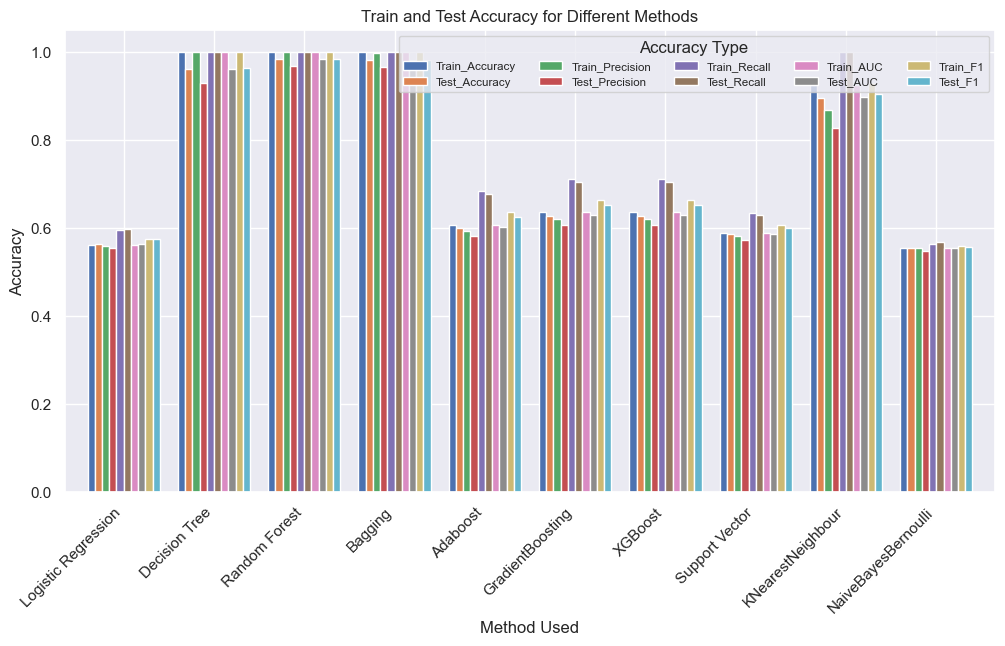

In [138]:

final_accuracy.plot(kind='bar',x='Method Used',figsize=(12,6),width=0.8)
plt.legend(title='Accuracy Type', loc='best',ncols=5,fontsize='x-small')
plt.title('Train and Test Accuracy for Different Methods')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method Used')
plt.ylabel('Accuracy')

plt.show()

In [222]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their distributions
param_dist = {'n_neighbors': randint(1, 20)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(knn, param_dist, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_k = random_search.best_params_['n_neighbors']


In [223]:
print(best_k)

4


In [142]:
# Model - KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=3)
knb = knn_best.fit(x_train,y_train)

y_pred_train_knb = knn_best.predict(x_train)
y_pred_test_knb = knn_best.predict(x_test)

train_accuracy_knb = accuracy_score(y_train,y_pred_train_knb)
test_accuracy_knb = accuracy_score(y_test,y_pred_test_knb)

train_precision_knb = precision_score(y_train,y_pred_train_knb)
test_precision_knb = precision_score(y_test,y_pred_test_knb)

train_recall_knb = recall_score(y_train,y_pred_train_knb)
test_recall_knb = recall_score(y_test,y_pred_test_knb)

train_auc_knb = roc_auc_score(y_train,y_pred_train_knb)
test_auc_knb = roc_auc_score(y_test,y_pred_test_knb)

train_f1_knb = f1_score(y_train,y_pred_train_knb)
test_f1_knb = f1_score(y_test,y_pred_test_knb)

In [143]:
print('Training Accuracy Score :',train_accuracy_knb)
print('Test Accuracy Score :',test_accuracy_knb)
print()
print(classification_report(y_train,y_pred_train_knb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_knb))

Training Accuracy Score : 0.9611396011396012
Test Accuracy Score : 0.9297110037378066

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     43752
           1       0.93      1.00      0.96     43998

    accuracy                           0.96     87750
   macro avg       0.96      0.96      0.96     87750
weighted avg       0.96      0.96      0.96     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     11092
           1       0.88      1.00      0.93     10846

    accuracy                           0.93     21938
   macro avg       0.94      0.93      0.93     21938
weighted avg       0.94      0.93      0.93     21938



## Approach 3 - Using Random Oversampling and Feature Importance Methods

In [147]:
x= df.drop(columns='is_claim')
y= df[['is_claim']]

In [148]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print(y_ros.value_counts())

is_claim
0           54844
1            3748
dtype: int64
is_claim
0           54844
1           54844
dtype: int64


### Splitting data into train and test

In [149]:
# Split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.25, random_state=101)

### Feature Selection with balanced data

### Technique 1 - Correlation Analysis

<Axes: >

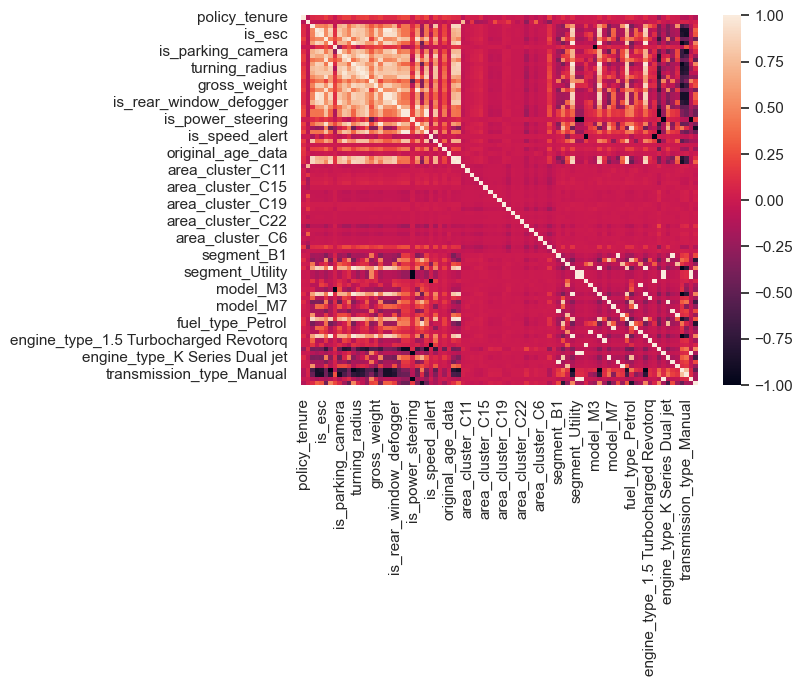

In [150]:
sns.heatmap(df.corr())

In [151]:
fi_df1 = df.corr()['is_claim'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','is_claim':'corr_coeff'})
fi_df1

feature  corr_coeff
0         population_density   -0.017808
1                       make   -0.000456
2                    airbags    0.002789
3                     is_esc    0.002995
4     is_adjustable_steering    0.013917
..                       ...         ...
81        engine_type_i-DTEC   -0.000833
82     rear_brakes_type_Drum   -0.000703
83  transmission_type_Manual   -0.000637
84      steering_type_Manual   -0.002128
85       steering_type_Power   -0.009169

[86 rows x 2 columns]

### Technique 2 - Random Forest Feature Importance

In [152]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_ros, y_ros)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': x_ros.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

feature  rf_importance
0                           policy_tenure       0.386049
31                      original_age_data       0.196919
30                       original_age_car       0.133599
1                      population_density       0.063695
53                        area_cluster_C8       0.013992
..                                    ...            ...
24                      is_power_steering       0.000222
59                        segment_Utility       0.000204
28                         is_speed_alert       0.000203
76  engine_type_1.5 Turbocharged Revotron       0.000196
61                              model_M11       0.000195

[86 rows x 2 columns]

### Technique 3 - Gradient Boosting Feature importances

In [153]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(x_ros, y_ros)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': x_ros.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

feature  gb_importance
0        policy_tenure       0.419131
30    original_age_car       0.291823
31   original_age_data       0.047982
15              height       0.039473
1   population_density       0.029261
..                 ...            ...
60           model_M10       0.000000
61           model_M11       0.000000
63            model_M3       0.000000
64            model_M4       0.000000
43    area_cluster_C19       0.000000

[86 rows x 2 columns]

### Technique 4 - Permutation Importance

In [158]:
from sklearn.inspection import permutation_importance


# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(x_ros, y_ros)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, x_ros, y_ros, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': x_ros.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

feature  permutation_importance
0                           policy_tenure                1.513633
30                       original_age_car                1.081483
31                      original_age_data                0.954249
1                      population_density                0.316330
16                           gross_weight                0.067211
..                                    ...                     ...
84                   steering_type_Manual                0.000026
76  engine_type_1.5 Turbocharged Revotron                0.000025
28                         is_speed_alert                0.000023
24                      is_power_steering                0.000022
59                        segment_Utility                0.000016

[86 rows x 2 columns]

### Technique 5 - LASSO

In [159]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_ros)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_ros)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': x_ros.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


feature  lasso_coeff
0        policy_tenure     0.078770
42    area_cluster_C18     0.003844
44     area_cluster_C2     0.001970
48     area_cluster_C3     0.001815
31   original_age_data     0.000920
..                 ...          ...
24   is_power_steering    -0.000000
38    area_cluster_C14     0.000000
54     area_cluster_C9    -0.001344
1   population_density    -0.004657
30    original_age_car    -0.033109

[86 rows x 2 columns]

### Technique 6 - RFE

In [160]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=x.shape[1], step=1)
selector_label = selector_label.fit(x_ros, y_ros)

# Get the selected features based on RFE
selected_features = x_ros.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


feature  rfe_score
0                           policy_tenure   0.384232
31                      original_age_data   0.196912
30                       original_age_car   0.131651
1                      population_density   0.065456
53                        area_cluster_C8   0.014208
..                                    ...        ...
78                       engine_type_G12B   0.000225
60                              model_M10   0.000206
84                   steering_type_Manual   0.000206
24                      is_power_steering   0.000202
76  engine_type_1.5 Turbocharged Revotron   0.000193

[86 rows x 2 columns]

In [163]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').set_index('feature')

In [164]:
final_fi_df


corr_coeff  rf_importance  gb_importance  \
feature                                                              
population_density         -0.017808       0.063695       0.029261   
make                       -0.000456       0.002546       0.000764   
airbags                     0.002789       0.001242       0.000000   
is_esc                      0.002995       0.001260       0.000342   
is_adjustable_steering      0.013917       0.000957       0.000375   
...                              ...            ...            ...   
engine_type_i-DTEC         -0.000833       0.000538       0.000000   
rear_brakes_type_Drum      -0.000703       0.000603       0.000000   
transmission_type_Manual   -0.000637       0.002123       0.000000   
steering_type_Manual       -0.002128       0.000255       0.000000   
steering_type_Power        -0.009169       0.001825       0.004569   

                          permutation_importance  lasso_coeff  rfe_score  
feature                                                                   
population_density                      0.316330    -0.004657   0.065456  
make                                    0.001362    -0.000000   0.002567  
airbags                                 0.000310     0.000000   0.001149  
is_esc                                  0.000535     0.000000   0.001279  
is_adjustable_steering                  0.000436     0.000000   0.000942  
...                                          ...          ...        ...  
engine_type_i-DTEC                      0.000105    -0.000000   0.000503  
rear_brakes_type_Drum                   0.000145     0.000000   0.000658  
transmission_type_Manual                0.001527     0.000000   0.002128  
steering_type_Manual                    0.000026     0.000000   0.000206  
steering_type_Power                     0.001381    -0.000000   0.001946  

[85 rows x 6 columns]

In [165]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [166]:
final_fi=final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score']].mean(axis=1).sort_values(ascending=False)

In [167]:
final_fi

feature
original_age_car        0.327868
original_age_data       0.264093
population_density      0.092722
height                  0.033047
gross_weight            0.025186
                          ...   
steering_type_Manual    0.000190
segment_Utility         0.000183
model_M11               0.000181
model_M10               0.000178
is_power_steering       0.000174
Length: 85, dtype: float64

In [168]:
drop_feat=final_fi.tail(30).index.values

In [169]:
print(drop_feat)

['segment_B1' 'airbags' 'is_adjustable_steering' 'area_cluster_C22'
 'area_cluster_C15' 'model_M8' 'model_M3' 'is_rear_window_wiper'
 'is_parking_sensors' 'is_tpms' 'fuel_type_Diesel' 'is_power_door_locks'
 'gear_box' 'is_ecw' 'engine_type_1.5 L U2 CRDi' 'rear_brakes_type_Drum'
 'segment_C2' 'is_speed_alert' 'model_M4' 'is_central_locking'
 'area_cluster_C20' 'model_M9' 'engine_type_1.5 Turbocharged Revotron'
 'engine_type_i-DTEC' 'engine_type_G12B' 'steering_type_Manual'
 'segment_Utility' 'model_M11' 'model_M10' 'is_power_steering']


In [170]:
pd.set_option('display.max_rows',100)

In [171]:
df.head()

policy_tenure  population_density  make  airbags  is_esc  \
0       0.515874                4990     1        2       0   
1       0.672619               27003     1        2       0   
2       0.841110                4076     1        2       0   
3       0.900277               21622     1        2       1   
4       0.596403               34738     2        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   displacement  cylinder  gear_box  turning_radius  length  width  height  \
0           796         3         5             4.6    3445   1515    1475   
1           796         3         5             4.6    3445   1515    1475   
2           796         3         5             4.6    3445   1515    1475   
3          1197         4         5             4.8    3995   1735    1515   
4           999         3         5             5.0    3731   1579    1490   

   gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0          1185                    0                     0   
1          1185                    0                     0   
2          1185                    0                     0   
3          1335                    1                     0   
4          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0               1            0         0              0.75          70.826923   
1               1            0         0              0.30          48.750000   
2               1            0         0              0.30          49.538462   
3               1            2         0              1.65          53.480769   
4               1            2         0              1.65          70.038462   

   torque(Nm/rpm)  power(bhp/rpm)  area_cluster_C10  area_cluster_C11  \
0            0.02            0.01                 0                 0   
1            0.02            0.01                 0                 0   
2            0.02            0.01                 0                 0   
3            0.03            0.01                 0                 0   
4            0.02            0.01                 0                 0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0                 0                

In [172]:
df.shape

(58592, 87)

In [173]:
df1=df.copy()

In [174]:
df1.head()

policy_tenure  population_density  make  airbags  is_esc  \
0       0.515874                4990     1        2       0   
1       0.672619               27003     1        2       0   
2       0.841110                4076     1        2       0   
3       0.900277               21622     1        2       1   
4       0.596403               34738     2        2       0   

   is_adjustable_steering  is_tpms  is_parking_sensors  is_parking_camera  \
0                       0        0                   1                  0   
1                       0        0                   1                  0   
2                       0        0                   1                  0   
3                       1        0                   1                  1   
4                       0        0                   0                  1   

   displacement  cylinder  gear_box  turning_radius  length  width  height  \
0           796         3         5             4.6    3445   1515    1475   
1           796         3         5             4.6    3445   1515    1475   
2           796         3         5             4.6    3445   1515    1475   
3          1197         4         5             4.8    3995   1735    1515   
4           999         3         5             5.0    3731   1579    1490   

   gross_weight  is_front_fog_lights  is_rear_window_wiper  \
0          1185                    0                     0   
1          1185                    0                     0   
2          1185                    0                     0   
3          1335                    1                     0   
4          1155                    0                     0   

   is_rear_window_washer  is_rear_window_defogger  is_brake_assist  \
0                      0                        0                0   
1                      0                        0                0   
2                      0                        0                0   
3                      0                        1                1   
4                      0                        0                0   

   is_power_door_locks  is_central_locking  is_power_steering  \
0                    0                   0                  1   
1                    0                   0                  1   
2                    0                   0                  1   
3                    1                   1                  1   
4                    1                   1                  1   

   is_driver_seat_height_adjustable  is_day_night_rear_view_mirror  is_ecw  \
0                                 0                              0       0   
1                                 0                              0       0   
2                                 0                              0       0   
3                                 1                              1       1   
4                                 0                              1       1   

   is_speed_alert  ncap_rating  is_claim  original_age_car  original_age_data  \
0               1            0         0              0.75          70.826923   
1               1            0         0              0.30          48.750000   
2               1            0         0              0.30          49.538462   
3               1            2         0              1.65          53.480769   
4               1            2         0              1.65          70.038462   

   torque(Nm/rpm)  power(bhp/rpm)  area_cluster_C10  area_cluster_C11  \
0            0.02            0.01                 0                 0   
1            0.02            0.01                 0                 0   
2            0.02            0.01                 0                 0   
3            0.03            0.01                 0                 0   
4            0.02            0.01                 0                 0   

   area_cluster_C12  area_cluster_C13  area_cluster_C14  area_cluster_C15  \
0                 0                

In [175]:
df1=df1.drop(columns=drop_feat)

In [176]:
df1.shape

(58592, 57)

In [177]:
x= df1.drop(columns='is_claim')
y= df1[['is_claim']]

In [178]:
x.shape

(58592, 56)

In [179]:
y.shape

(58592, 1)

In [180]:
y.value_counts()

is_claim
0           54844
1            3748
dtype: int64

In [181]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x, y)
print(y.value_counts())
print(y_ros.value_counts())

is_claim
0           54844
1            3748
dtype: int64
is_claim
0           54844
1           54844
dtype: int64


In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_sc = scaler.fit_transform(x_ros)

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros,y_ros,test_size=0.2, random_state=42)

In [184]:
# Model 1 - Logistic Regression
logistic = LogisticRegression()
lr = logistic.fit(x_train,y_train)

y_pred_train_lr = logistic.predict(x_train)
y_pred_test_lr = logistic.predict(x_test)

train_accuracy_lr = accuracy_score(y_train,y_pred_train_lr)
test_accuracy_lr = accuracy_score(y_test,y_pred_test_lr)

train_precision_lr = precision_score(y_train,y_pred_train_lr)
test_precision_lr = precision_score(y_test,y_pred_test_lr)

train_recall_lr = recall_score(y_train,y_pred_train_lr)
test_recall_lr = recall_score(y_test,y_pred_test_lr)

train_auc_lr = roc_auc_score(y_train,y_pred_train_lr)
test_auc_lr = roc_auc_score(y_test,y_pred_test_lr)

train_f1_lr = f1_score(y_train,y_pred_train_lr)
test_f1_lr = f1_score(y_test,y_pred_test_lr)


In [185]:
print('Training Accuracy Score :',train_accuracy_lr)
print('Test Accuracy Score :',test_accuracy_lr)
print()
print(classification_report(y_train,y_pred_train_lr))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_lr))

Training Accuracy Score : 0.5208774928774929
Test Accuracy Score : 0.5223812562676634

              precision    recall  f1-score   support

           0       0.52      0.47      0.49     43752
           1       0.52      0.58      0.55     43998

    accuracy                           0.52     87750
   macro avg       0.52      0.52      0.52     87750
weighted avg       0.52      0.52      0.52     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.53      0.48      0.50     11092
           1       0.52      0.57      0.54     10846

    accuracy                           0.52     21938
   macro avg       0.52      0.52      0.52     21938
weighted avg       0.52      0.52      0.52     21938



In [186]:
# Model 2 - Decision Tree
dtree = DecisionTreeClassifier()
dt = dtree.fit(x_train,y_train)

y_pred_train_dt = dtree.predict(x_train)
y_pred_test_dt = dtree.predict(x_test)

train_accuracy_dt = accuracy_score(y_train,y_pred_train_dt)
test_accuracy_dt = accuracy_score(y_test,y_pred_test_dt)

train_precision_dt = precision_score(y_train,y_pred_train_dt)
test_precision_dt = precision_score(y_test,y_pred_test_dt)

train_recall_dt = recall_score(y_train,y_pred_train_dt)
test_recall_dt = recall_score(y_test,y_pred_test_dt)

train_auc_dt = roc_auc_score(y_train,y_pred_train_dt)
test_auc_dt = roc_auc_score(y_test,y_pred_test_dt)

train_f1_dt = f1_score(y_train,y_pred_train_dt)
test_f1_dt = f1_score(y_test,y_pred_test_dt)

In [187]:
print('Training Accuracy Score :',train_accuracy_dt)
print('Test Accuracy Score :',test_accuracy_dt)
print()
print(classification_report(y_train,y_pred_train_dt))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_dt))

Training Accuracy Score : 1.0
Test Accuracy Score : 0.9621205214695961

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     11092
           1       0.93      1.00      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938



In [188]:
# Model 3 - Random Forest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(x_train,y_train)

y_pred_train_rf = rfmodel.predict(x_train)
y_pred_test_rf = rfmodel.predict(x_test)

train_accuracy_rf = accuracy_score(y_train,y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test,y_pred_test_rf)

train_precision_rf = precision_score(y_train,y_pred_train_rf)
test_precision_rf = precision_score(y_test,y_pred_test_rf)

train_recall_rf = recall_score(y_train,y_pred_train_rf)
test_recall_rf = recall_score(y_test,y_pred_test_rf)

train_auc_rf = roc_auc_score(y_train,y_pred_train_rf)
test_auc_rf = roc_auc_score(y_test,y_pred_test_rf)

train_f1_rf = f1_score(y_train,y_pred_train_rf)
test_f1_rf = f1_score(y_test,y_pred_test_rf)

In [189]:
print('Training Accuracy Score :',train_accuracy_rf)
print('Test Accuracy Score :',test_accuracy_rf)
print()
print(classification_report(y_train,y_pred_train_rf))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_rf))

Training Accuracy Score : 1.0
Test Accuracy Score : 0.983909198650743

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     11092
           1       0.97      1.00      0.98     10846

    accuracy                           0.98     21938
   macro avg       0.98      0.98      0.98     21938
weighted avg       0.98      0.98      0.98     21938



In [190]:
# Model 4 - Bagging Classifier
bagg = BaggingClassifier()
bg = bagg.fit(x_train,y_train)

y_pred_train_bg = bagg.predict(x_train)
y_pred_test_bg = bagg.predict(x_test)

train_accuracy_bg = accuracy_score(y_train,y_pred_train_bg)
test_accuracy_bg = accuracy_score(y_test,y_pred_test_bg)

train_precision_bg = precision_score(y_train,y_pred_train_bg)
test_precision_bg = precision_score(y_test,y_pred_test_bg)

train_recall_bg = recall_score(y_train,y_pred_train_bg)
test_recall_bg = recall_score(y_test,y_pred_test_bg)

train_auc_bg = roc_auc_score(y_train,y_pred_train_bg)
test_auc_bg = roc_auc_score(y_test,y_pred_test_bg)

train_f1_bg = f1_score(y_train,y_pred_train_bg)
test_f1_bg = f1_score(y_test,y_pred_test_bg)

In [191]:
print('Training Accuracy Score :',train_accuracy_bg)
print('Test Accuracy Score :',test_accuracy_bg)
print()
print(classification_report(y_train,y_pred_train_bg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_bg))

Training Accuracy Score : 0.9997720797720798
Test Accuracy Score : 0.9867809280700155

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     11092
           1       0.97      1.00      0.99     10846

    accuracy                           0.99     21938
   macro avg       0.99      0.99      0.99     21938
weighted avg       0.99      0.99      0.99     21938



In [192]:
# Model 5 - AdaaBoost Classifier
ada = AdaBoostClassifier()
ad = ada.fit(x_train,y_train)

y_pred_train_ad = ada.predict(x_train)
y_pred_test_ad = ada.predict(x_test)

train_accuracy_ad = accuracy_score(y_train,y_pred_train_ad)
test_accuracy_ad = accuracy_score(y_test,y_pred_test_ad)

train_precision_ad = precision_score(y_train,y_pred_train_ad)
test_precision_ad = precision_score(y_test,y_pred_test_ad)

train_recall_ad = recall_score(y_train,y_pred_train_ad)
test_recall_ad = recall_score(y_test,y_pred_test_ad)

train_auc_ad = roc_auc_score(y_train,y_pred_train_ad)
test_auc_ad = roc_auc_score(y_test,y_pred_test_ad)

train_f1_ad = f1_score(y_train,y_pred_train_ad)
test_f1_ad = f1_score(y_test,y_pred_test_ad)

In [193]:
print('Training Accuracy Score :',train_accuracy_ad)
print('Test Accuracy Score :',test_accuracy_ad)
print()
print(classification_report(y_train,y_pred_train_ad))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_ad))

Training Accuracy Score : 0.6136524216524216
Test Accuracy Score : 0.6164189989971739

              precision    recall  f1-score   support

           0       0.63      0.54      0.58     43752
           1       0.60      0.69      0.64     43998

    accuracy                           0.61     87750
   macro avg       0.62      0.61      0.61     87750
weighted avg       0.62      0.61      0.61     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.65      0.53      0.58     11092
           1       0.60      0.70      0.64     10846

    accuracy                           0.62     21938
   macro avg       0.62      0.62      0.61     21938
weighted avg       0.62      0.62      0.61     21938



In [194]:
# Model 6 - Gradient Boosting Classifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(x_train,y_train)

y_pred_train_gd = gdb.predict(x_train)
y_pred_test_gd = gdb.predict(x_test)

train_accuracy_gd = accuracy_score(y_train,y_pred_train_gd)
test_accuracy_gd = accuracy_score(y_test,y_pred_test_gd)

train_precision_gd = precision_score(y_train,y_pred_train_gd)
test_precision_gd = precision_score(y_test,y_pred_test_gd)

train_recall_gd = recall_score(y_train,y_pred_train_gd)
test_recall_gd = recall_score(y_test,y_pred_test_gd)

train_auc_gd = roc_auc_score(y_train,y_pred_train_gd)
test_auc_gd = roc_auc_score(y_test,y_pred_test_gd)

train_f1_gd = f1_score(y_train,y_pred_train_gd)
test_f1_gd = f1_score(y_test,y_pred_test_gd)

In [195]:
print('Training Accuracy Score :',train_accuracy_gd)
print('Test Accuracy Score :',test_accuracy_gd)
print()
print(classification_report(y_train,y_pred_train_gd))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_gd))

Training Accuracy Score : 0.6401595441595441
Test Accuracy Score : 0.6377062631051145

              precision    recall  f1-score   support

           0       0.66      0.56      0.61     43752
           1       0.62      0.72      0.67     43998

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.67      0.55      0.61     11092
           1       0.61      0.72      0.66     10846

    accuracy                           0.64     21938
   macro avg       0.64      0.64      0.64     21938
weighted avg       0.64      0.64      0.64     21938



In [196]:
# Model 7 - XG Boosting Classifier
xgb = GradientBoostingClassifier()
xg = xgb.fit(x_train,y_train)

y_pred_train_xg = xgb.predict(x_train)
y_pred_test_xg = xgb.predict(x_test)

train_accuracy_xg = accuracy_score(y_train,y_pred_train_xg)
test_accuracy_xg = accuracy_score(y_test,y_pred_test_xg)

train_precision_xg = precision_score(y_train,y_pred_train_xg)
test_precision_xg = precision_score(y_test,y_pred_test_xg)

train_recall_xg = recall_score(y_train,y_pred_train_xg)
test_recall_xg = recall_score(y_test,y_pred_test_xg)

train_auc_xg = roc_auc_score(y_train,y_pred_train_xg)
test_auc_xg = roc_auc_score(y_test,y_pred_test_xg)

train_f1_xg = f1_score(y_train,y_pred_train_xg)
test_f1_xg = f1_score(y_test,y_pred_test_xg)

In [197]:
print('Training Accuracy Score :',train_accuracy_xg)
print('Test Accuracy Score :',test_accuracy_xg)
print()
print(classification_report(y_train,y_pred_train_xg))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_xg))

Training Accuracy Score : 0.6401595441595441
Test Accuracy Score : 0.6377062631051145

              precision    recall  f1-score   support

           0       0.66      0.56      0.61     43752
           1       0.62      0.72      0.67     43998

    accuracy                           0.64     87750
   macro avg       0.64      0.64      0.64     87750
weighted avg       0.64      0.64      0.64     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.67      0.55      0.61     11092
           1       0.61      0.72      0.66     10846

    accuracy                           0.64     21938
   macro avg       0.64      0.64      0.64     21938
weighted avg       0.64      0.64      0.64     21938



In [198]:
# Model 8 - SVC Classifier
svc = SVC()
sv = svc.fit(x_train,y_train)

y_pred_train_sv = svc.predict(x_train)
y_pred_test_sv = svc.predict(x_test)

train_accuracy_sv = accuracy_score(y_train,y_pred_train_sv)
test_accuracy_sv = accuracy_score(y_test,y_pred_test_sv)

train_precision_sv = precision_score(y_train,y_pred_train_sv)
test_precision_sv = precision_score(y_test,y_pred_test_sv)

train_recall_sv = recall_score(y_train,y_pred_train_sv)
test_recall_sv = recall_score(y_test,y_pred_test_sv)

train_auc_sv = roc_auc_score(y_train,y_pred_train_sv)
test_auc_sv = roc_auc_score(y_test,y_pred_test_sv)

train_f1_sv = f1_score(y_train,y_pred_train_sv)
test_f1_sv = f1_score(y_test,y_pred_test_sv)

In [199]:
print('Training Accuracy Score :',train_accuracy_sv)
print('Test Accuracy Score :',test_accuracy_sv)
print()
print(classification_report(y_train,y_pred_train_sv))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_sv))

Training Accuracy Score : 0.5165584045584045
Test Accuracy Score : 0.5151335582094995

              precision    recall  f1-score   support

           0       0.54      0.21      0.31     43752
           1       0.51      0.82      0.63     43998

    accuracy                           0.52     87750
   macro avg       0.52      0.52      0.47     87750
weighted avg       0.52      0.52      0.47     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.55      0.22      0.31     11092
           1       0.51      0.82      0.63     10846

    accuracy                           0.52     21938
   macro avg       0.53      0.52      0.47     21938
weighted avg       0.53      0.52      0.47     21938



In [200]:
# Model 9 - KNN Classifier
knn = KNeighborsClassifier()
kn = knn.fit(x_train,y_train)

y_pred_train_kn = knn.predict(x_train)
y_pred_test_kn = knn.predict(x_test)

train_accuracy_kn = accuracy_score(y_train,y_pred_train_kn)
test_accuracy_kn = accuracy_score(y_test,y_pred_test_kn)

train_precision_kn = precision_score(y_train,y_pred_train_kn)
test_precision_kn = precision_score(y_test,y_pred_test_kn)

train_recall_kn = recall_score(y_train,y_pred_train_kn)
test_recall_kn = recall_score(y_test,y_pred_test_kn)

train_auc_kn = roc_auc_score(y_train,y_pred_train_kn)
test_auc_kn = roc_auc_score(y_test,y_pred_test_kn)

train_f1_kn = f1_score(y_train,y_pred_train_kn)
test_f1_kn = f1_score(y_test,y_pred_test_kn)

In [201]:
print('Training Accuracy Score :',train_accuracy_kn)
print('Test Accuracy Score :',test_accuracy_kn)
print()
print(classification_report(y_train,y_pred_train_kn))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_kn))

Training Accuracy Score : 0.9253105413105414
Test Accuracy Score : 0.8942930075667791

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     43752
           1       0.87      1.00      0.93     43998

    accuracy                           0.93     87750
   macro avg       0.94      0.93      0.92     87750
weighted avg       0.93      0.93      0.92     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     11092
           1       0.82      1.00      0.90     10846

    accuracy                           0.89     21938
   macro avg       0.91      0.90      0.89     21938
weighted avg       0.91      0.89      0.89     21938



In [202]:
# Model 10 - Naive Bayes Theorem - Bernouli
naive_nb = BernoulliNB()
nb = naive_nb.fit(x_train,y_train)

y_pred_train_nb = naive_nb.predict(x_train)
y_pred_test_nb = naive_nb.predict(x_test)

train_accuracy_nb = accuracy_score(y_train,y_pred_train_nb)
test_accuracy_nb = accuracy_score(y_test,y_pred_test_nb)

train_precision_nb = precision_score(y_train,y_pred_train_nb)
test_precision_nb = precision_score(y_test,y_pred_test_nb)

train_recall_nb = recall_score(y_train,y_pred_train_nb)
test_recall_nb = recall_score(y_test,y_pred_test_nb)

train_auc_nb = roc_auc_score(y_train,y_pred_train_nb)
test_auc_nb = roc_auc_score(y_test,y_pred_test_nb)

train_f1_nb = f1_score(y_train,y_pred_train_nb)
test_f1_nb = f1_score(y_test,y_pred_test_nb)

In [203]:
print('Training Accuracy Score :',train_accuracy_nb)
print('Test Accuracy Score :',test_accuracy_nb)
print()
print(classification_report(y_train,y_pred_train_nb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_nb))

Training Accuracy Score : 0.5554757834757835
Test Accuracy Score : 0.5610356459112043

              precision    recall  f1-score   support

           0       0.57      0.46      0.51     43752
           1       0.55      0.65      0.59     43998

    accuracy                           0.56     87750
   macro avg       0.56      0.56      0.55     87750
weighted avg       0.56      0.56      0.55     87750

*********************************************************************
              precision    recall  f1-score   support

           0       0.58      0.47      0.52     11092
           1       0.55      0.65      0.60     10846

    accuracy                           0.56     21938
   macro avg       0.56      0.56      0.56     21938
weighted avg       0.56      0.56      0.56     21938



In [204]:
list1=['Logistic Regression', 'Decision Tree', 'Random Forest', 'Bagging','Adaboost','GradientBoosting','XGBoost',
      'Support Vector', 'KNearestNeighbour','NaiveBayesBernoulli']

list2 = [train_accuracy_lr,train_accuracy_dt, train_accuracy_rf,train_accuracy_bg,train_accuracy_ad,
         train_accuracy_gd,train_accuracy_xg,train_accuracy_sv,train_accuracy_kn,train_accuracy_nb]

list3 = [test_accuracy_lr,test_accuracy_dt, test_accuracy_rf,test_accuracy_bg,test_accuracy_ad,
         test_accuracy_gd,test_accuracy_xg,test_accuracy_sv,test_accuracy_kn,test_accuracy_nb]

list4 = [train_precision_lr,train_precision_dt, train_precision_rf,train_precision_bg,train_precision_ad,
         train_precision_gd,train_precision_xg,train_precision_sv,train_precision_kn,train_precision_nb]

list5 = [test_precision_lr,test_precision_dt, test_precision_rf,test_precision_bg,test_precision_ad,
         test_precision_gd,test_precision_xg,test_precision_sv,test_precision_kn,test_precision_nb]

list6 = [train_recall_lr,train_recall_dt, train_recall_rf,train_recall_bg,train_recall_ad,
         train_recall_gd,train_recall_xg,train_recall_sv,train_recall_kn,train_recall_nb]

list7 = [test_recall_lr,test_recall_dt, test_recall_rf,test_recall_bg,test_recall_ad,
         test_recall_gd,test_recall_xg,test_recall_sv,test_recall_kn,test_recall_nb]

list8 = [train_auc_lr,train_auc_dt, train_auc_rf,train_auc_bg,train_auc_ad,
         train_auc_gd,train_auc_xg,train_auc_sv,train_auc_kn,train_auc_nb]

list9 = [test_auc_lr,test_auc_dt, test_auc_rf,test_auc_bg,test_auc_ad,
         test_auc_gd,test_auc_xg,test_auc_sv,test_auc_kn,test_auc_nb]

list10 = [train_f1_lr,train_f1_dt, train_f1_rf,train_f1_bg,train_f1_ad,
         train_f1_gd,train_f1_xg,train_f1_sv,train_f1_kn,train_f1_nb]

list11 = [test_f1_lr,test_f1_dt, test_f1_rf,test_f1_bg,test_f1_ad,
         test_f1_gd,test_f1_xg,test_f1_sv,test_f1_kn,test_f1_nb]

list15 = [logistic,dtree,rfmodel,bagg,ada,gdb,xgb,svc,knn,naive_nb]


final_accuracy = pd.DataFrame({'Method Used': list1,'Train_Accuracy': list2,'Test_Accuracy': list3,
                               'Train_Precision': list4,'Test_Precision': list5,
                              'Train_Recall': list6,'Test_Recall': list7,
                              'Train_AUC': list8,'Test_AUC': list9,
                              'Train_F1': list10,'Test_F1': list11})
print(final_accuracy)

           Method Used  Train_Accuracy  Test_Accuracy  Train_Precision  \
0  Logistic Regression        0.520877       0.522381         0.520061   
1        Decision Tree        1.000000       0.962121         1.000000   
2        Random Forest        1.000000       0.983909         1.000000   
3              Bagging        0.999772       0.986781         0.999546   
4             Adaboost        0.613652       0.616419         0.599543   
5     GradientBoosting        0.640160       0.637706         0.622611   
6              XGBoost        0.640160       0.637706         0.622611   
7       Support Vector        0.516558       0.515134         0.511206   
8    KNearestNeighbour        0.925311       0.894293         0.870425   
9  NaiveBayesBernoulli        0.555476       0.561036         0.548080   

   Test_Precision  Train_Recall  Test_Recall  Train_AUC  Test_AUC  Train_F1  \
0        0.515323      0.575958     0.570533   0.520723  0.522915  0.546584   
1        0.928834      1.00

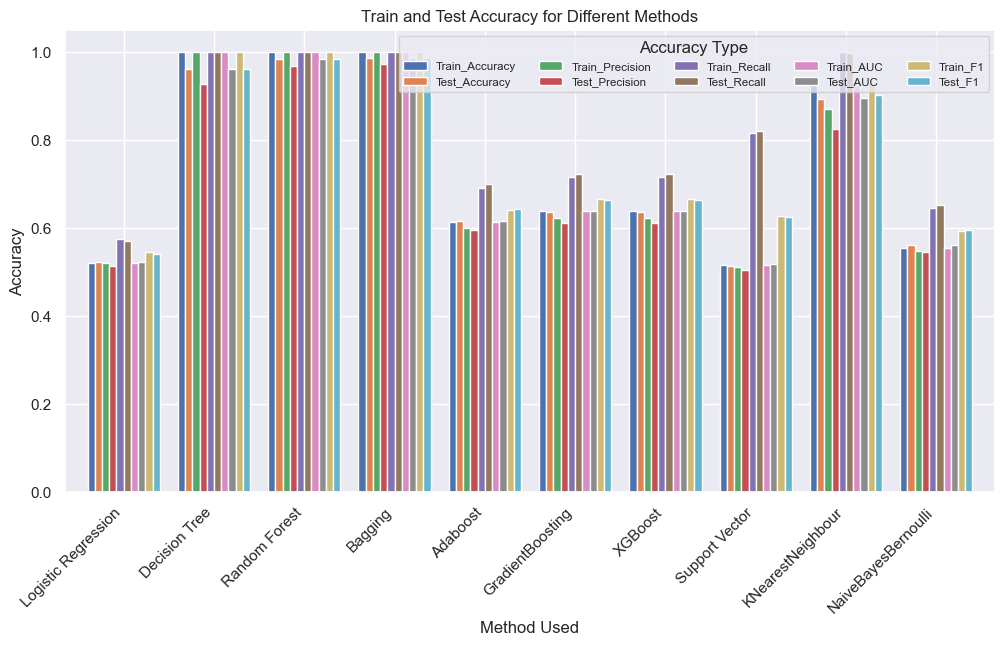

In [206]:

final_accuracy.plot(kind='bar',x='Method Used',figsize=(12,6),width=0.8)
plt.legend(title='Accuracy Type', loc='best',ncols=5,fontsize='x-small')
plt.title('Train and Test Accuracy for Different Methods')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Method Used')
plt.ylabel('Accuracy')

plt.show()

In [220]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their distributions
param_dist = {'n_neighbors': randint(1, 20)}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Perform randomized search
random_search = RandomizedSearchCV(knn, param_dist, cv=5, n_iter=10, scoring='accuracy')
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_k = random_search.best_params_['n_neighbors']


In [221]:
print(best_k)

1


In [229]:
# Model - KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=4)
knb = knn_best.fit(x_train,y_train)

y_pred_train_knb = knn_best.predict(x_train)
y_pred_test_knb = knn_best.predict(x_test)

train_accuracy_knb = accuracy_score(y_train,y_pred_train_knb)
test_accuracy_knb = accuracy_score(y_test,y_pred_test_knb)

train_precision_knb = precision_score(y_train,y_pred_train_knb)
test_precision_knb = precision_score(y_test,y_pred_test_knb)

train_recall_knb = recall_score(y_train,y_pred_train_knb)
test_recall_knb = recall_score(y_test,y_pred_test_knb)

train_auc_knb = roc_auc_score(y_train,y_pred_train_knb)
test_auc_knb = roc_auc_score(y_test,y_pred_test_knb)

train_f1_knb = f1_score(y_train,y_pred_train_knb)
test_f1_knb = f1_score(y_test,y_pred_test_knb)

In [230]:
print('Training Accuracy Score :',train_accuracy_knb)
print('Test Accuracy Score :',test_accuracy_knb)
print()
print(classification_report(y_train,y_pred_train_knb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_knb))

Training Accuracy Score : 0.9613105413105413
Test Accuracy Score : 0.926429027258638

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     43752
           1       0.93      1.00      0.96     43998

    accuracy                           0.96     87750
   macro avg       0.96      0.96      0.96     87750
weighted avg       0.96      0.96      0.96     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     11092
           1       0.87      1.00      0.93     10846

    accuracy                           0.93     21938
   macro avg       0.93      0.93      0.93     21938
weighted avg       0.94      0.93      0.93     21938



In [227]:
# Model - KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=1)
knb = knn_best.fit(x_train,y_train)

y_pred_train_knb = knn_best.predict(x_train)
y_pred_test_knb = knn_best.predict(x_test)

train_accuracy_knb = accuracy_score(y_train,y_pred_train_knb)
test_accuracy_knb = accuracy_score(y_test,y_pred_test_knb)

train_precision_knb = precision_score(y_train,y_pred_train_knb)
test_precision_knb = precision_score(y_test,y_pred_test_knb)

train_recall_knb = recall_score(y_train,y_pred_train_knb)
test_recall_knb = recall_score(y_test,y_pred_test_knb)

train_auc_knb = roc_auc_score(y_train,y_pred_train_knb)
test_auc_knb = roc_auc_score(y_test,y_pred_test_knb)

train_f1_knb = f1_score(y_train,y_pred_train_knb)
test_f1_knb = f1_score(y_test,y_pred_test_knb)

In [228]:
print('Training Accuracy Score :',train_accuracy_knb)
print('Test Accuracy Score :',test_accuracy_knb)
print()
print(classification_report(y_train,y_pred_train_knb))
print('*********************************************************************')
print(classification_report(y_test,y_pred_test_knb))

Training Accuracy Score : 0.9995327635327635
Test Accuracy Score : 0.9613911933631142

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43752
           1       1.00      1.00      1.00     43998

    accuracy                           1.00     87750
   macro avg       1.00      1.00      1.00     87750
weighted avg       1.00      1.00      1.00     87750

*********************************************************************
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11092
           1       0.93      1.00      0.96     10846

    accuracy                           0.96     21938
   macro avg       0.96      0.96      0.96     21938
weighted avg       0.96      0.96      0.96     21938



## Conclusion

#### Best Result given by - 
- Approach 2 ie using RandomOver Sampling Method and PCA
- KNearest Neighbour with best K value of 3